In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.engine import Engine
from simulation.map import Map
from simulation.simulation import Simulation
from statistics import Statistics
from simulation.car import Car
from simulation.engine import Engine


In [2]:
s = Statistics()

# Research description

Max possible cars on map is 1128. At this number there is no free space on roads so cars can't drive. To simulate different traffic volumes four classes (number of cars on the map) will be created:
* 112 -> 10%,
* 282 -> 25%,
* 564 -> 50%,
* 846 -> 75%

It can be interpreted as different time of the day, for example: nighttime, morning-time or afternoon rush hour.
To measure how different scenarios is affects traffic, the following data will be collected during the simulation:
* average speed of all cars
* percentage of cars that are standing
* percentage of cars that are going
* average travel time for a specified distance

The fallowing tests will be carried out:
* simulating different traffic volumes and their impact on traffic
* simulating traffic with and without traffic lights
* simulating different traffic light times and their impact on traffic

# Simulating different scenarios (traffic volumes)

In [3]:
cars_numbers = [112, 282, 564, 846]
distances = [25, 50, 100, 150]
mean_vs_lists = []
stop_cars_lists = []
moving_cars_list = []
heat_map_lists = []
average_section_travel_time_lists = []
TICKS = 500

# loop through different scenarios (cars number on map)
for cars_number in cars_numbers:
    TICKS = 500
    V_MAX = 6
    CARS_NUMBER = cars_number

    map = Map(100)
    simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, lights=False, lights_time=None, time=1)
    engine = Engine(simulation, map)

    mean_vs = []
    stop_cars = []
    moving_cars = []
    heat_map = engine.map.car_v_map
    times = []
    #loop simulation number of ticks
    for i in range(TICKS):
        engine.loop(time=1) # no need time here
        mean_vs.append(s.mean_v(engine.map.car_v_map, CARS_NUMBER))
        stop_cars.append(s.cars_stop_ratio(engine.map.car_v_map, CARS_NUMBER))
        moving_cars.append((s.cars_move_ratio(engine.map.car_v_map, CARS_NUMBER)))
        heat_map += engine.map.car_v_map

    #calculation of travel times
    for distance in distances:
        time = s.average_section_travel_time(engine.simulation.cars, distance, CARS_NUMBER, TICKS)
        times.append(time)

    #updating lists (need for visualizations)
    mean_vs_lists.append(mean_vs)
    stop_cars_lists.append(stop_cars)
    moving_cars_list.append(moving_cars)
    heat_map_lists.append(heat_map)
    average_section_travel_time_lists.append(times)

## Average speed

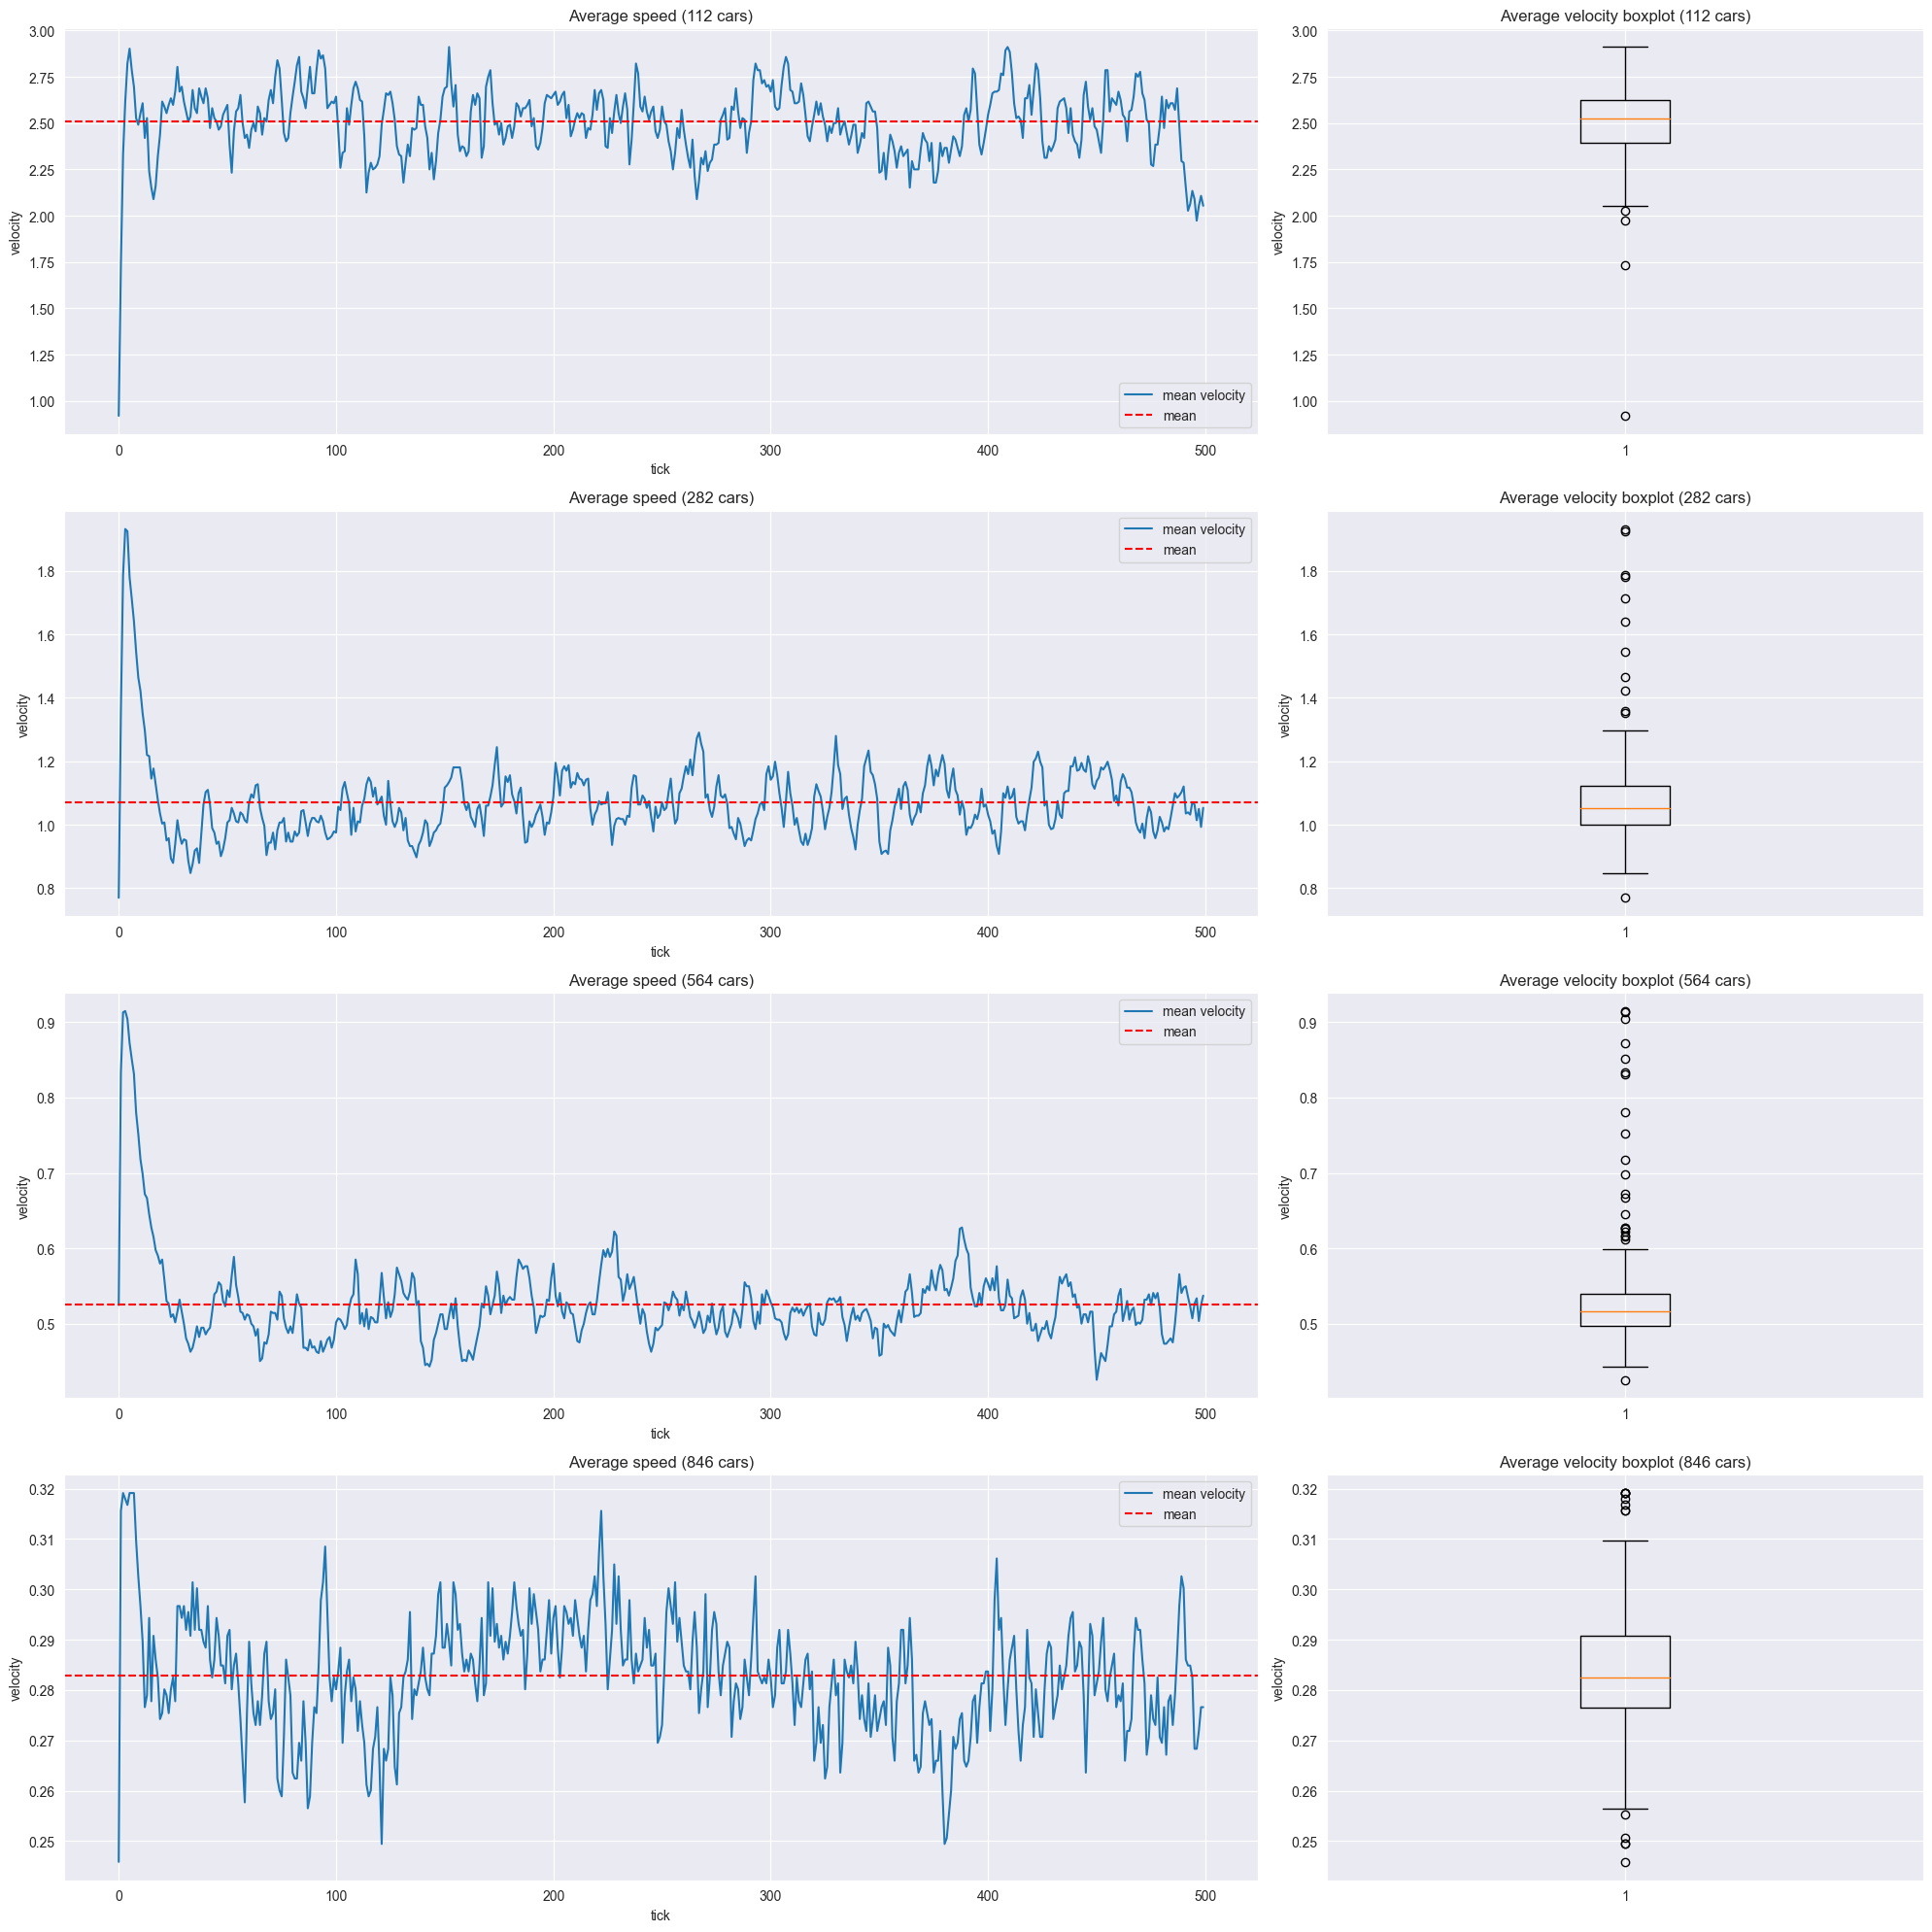

In [4]:
s.generate_average_speed_plots(mean_vs_lists, cars_numbers, True, 'Average_speed_no_lights')

Greater congestion on the roads reduces the average speed of cars. In the case of almost empty roads (case No. 1 (10%)), the average speed of moving cars is close to the value of 2.5 with a scattering of data close to 0.5 in both directions. In peaks, average speeds close to 3 can be observed. As the number of cars increases, the values drop sharply to about (successive next cases) 1.1, 0.52, 0.28. As the number of cars increases, the scatter of values from the average is also noticeable.

## Stop/moving cars ratio

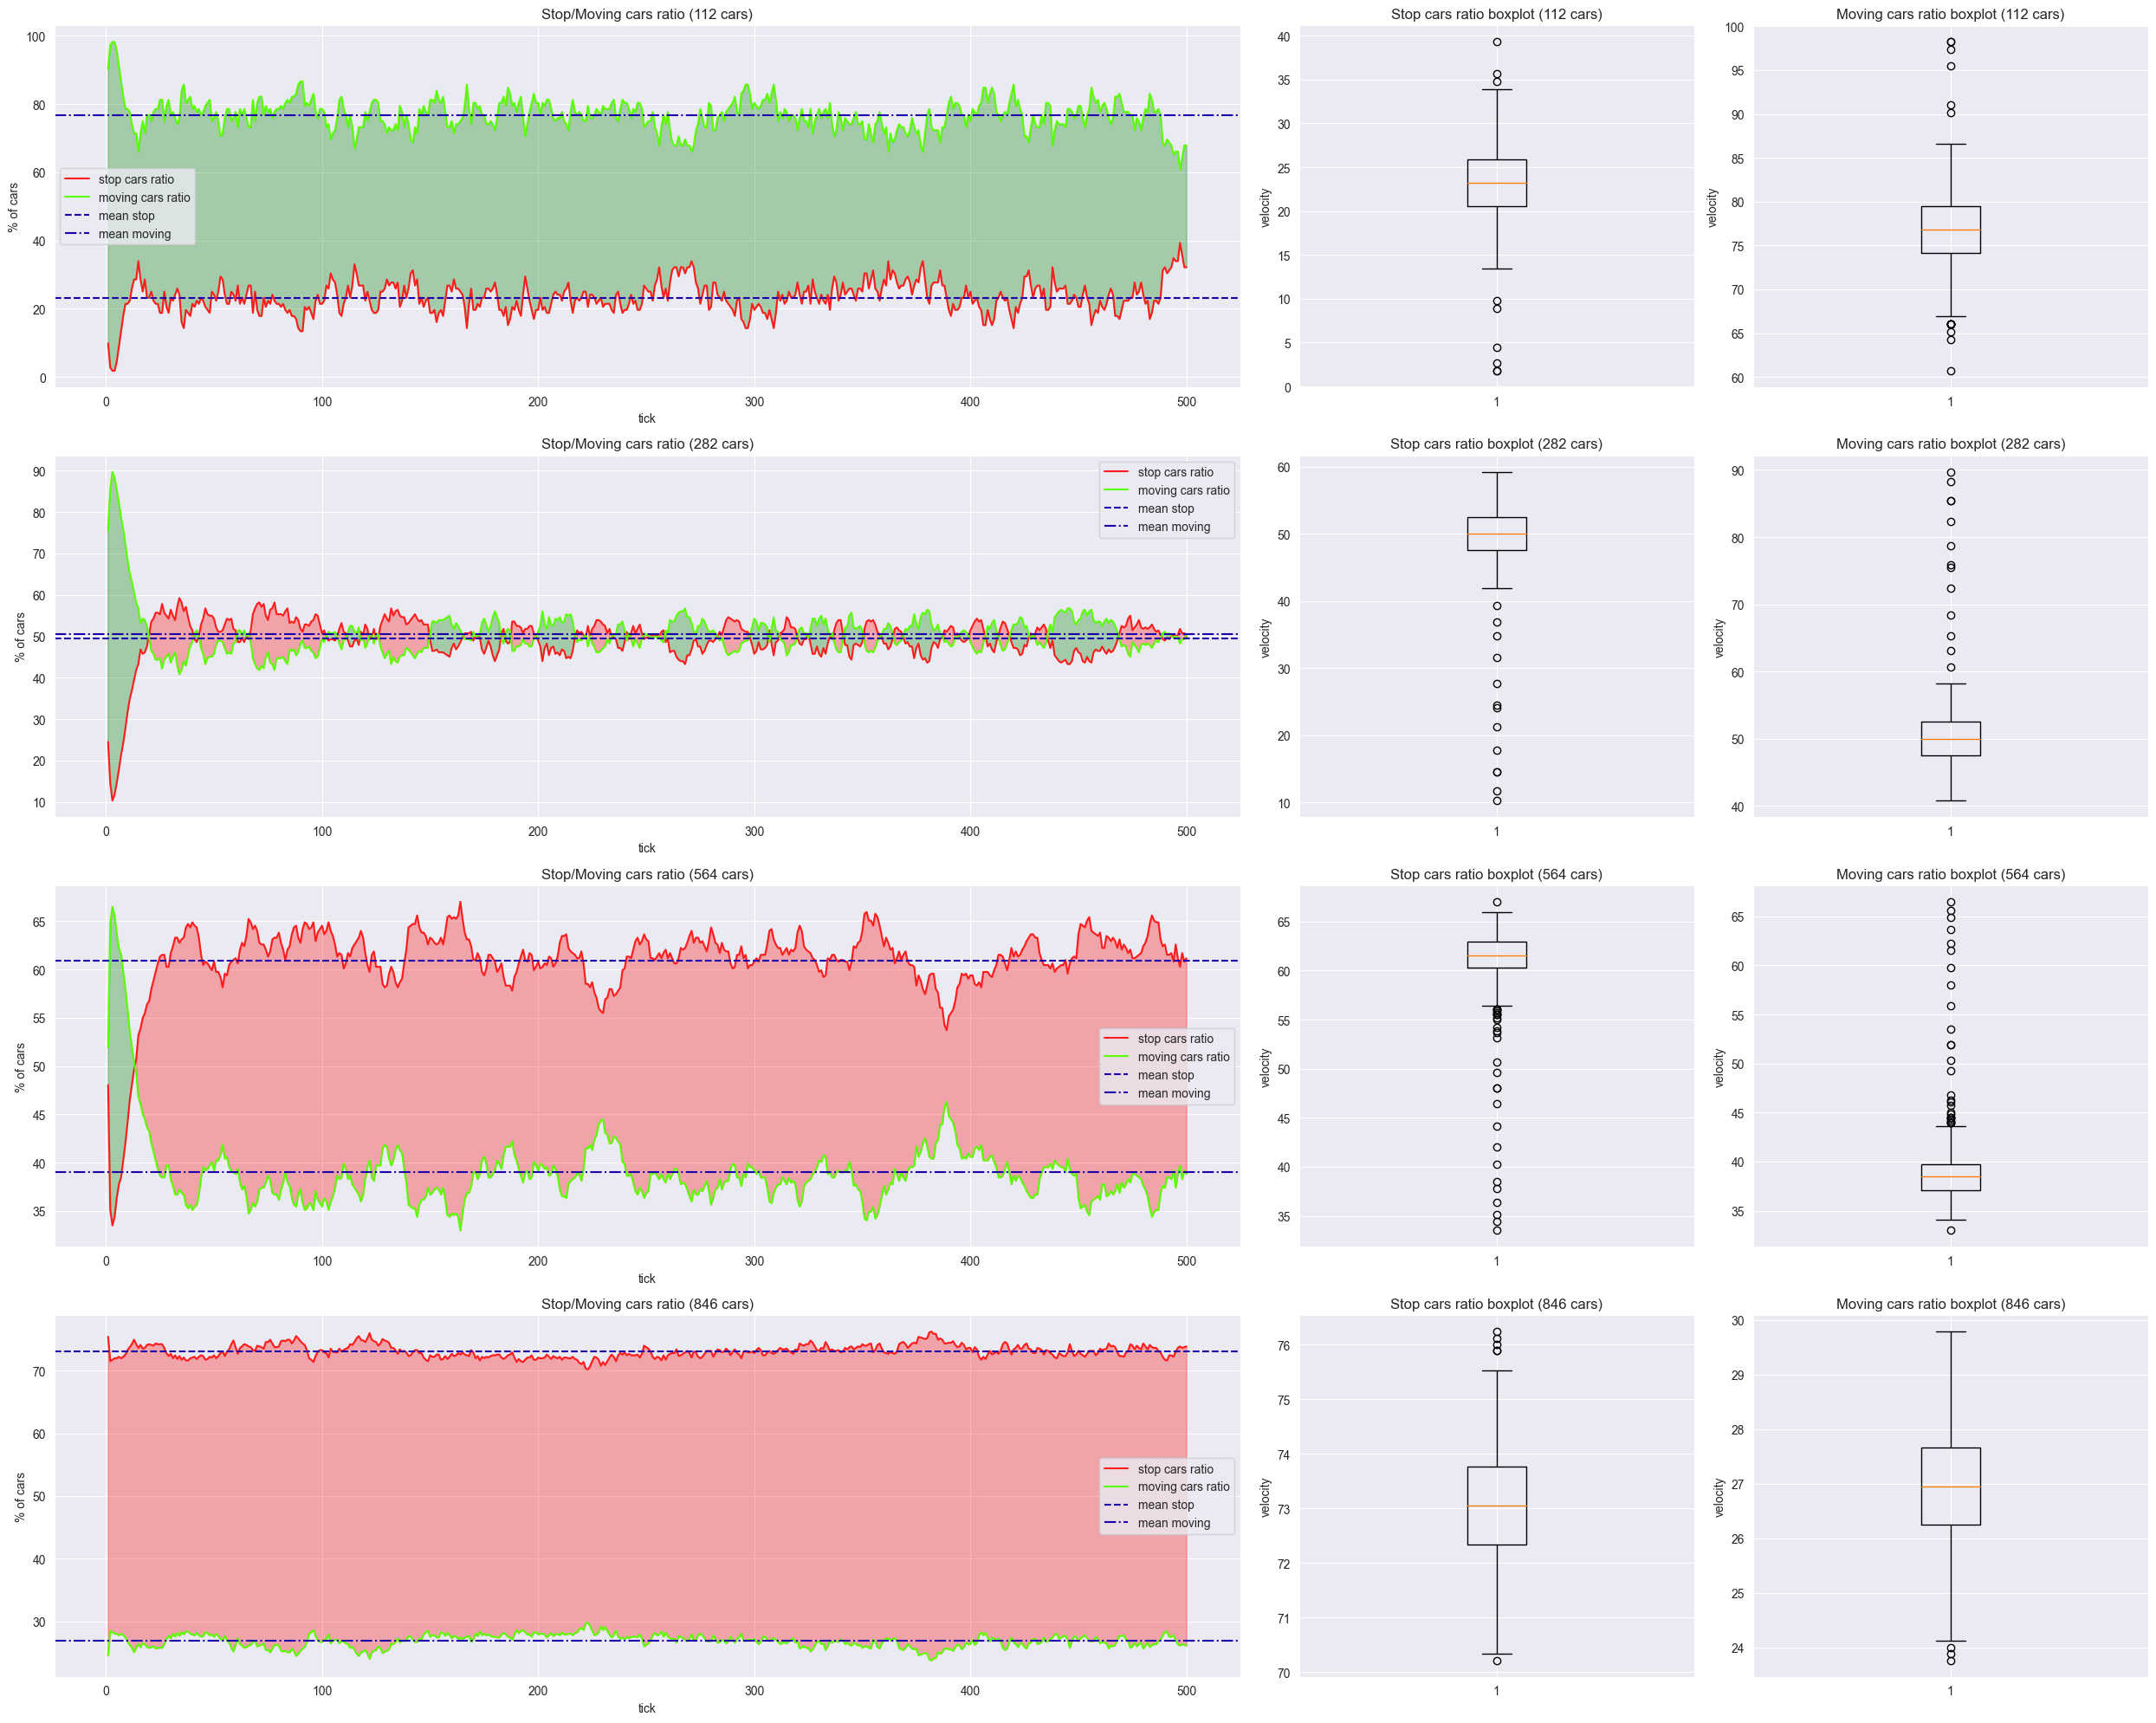

In [5]:
s.generate_stop_moving_cars_plots(stop_cars_lists, moving_cars_list, cars_numbers, TICKS, True, 'Stop_moving_no_lights')

The percentage of cars moving (as the simulation continues) in the first case is close to 80 percent and remains so throughout the simulation which results in the vast majority of cars moving all the time. In the second case, the percentage of cars standing and driving throughout the simulation is close to 50 percent which results in about half of the cars being in constant motion. In the next cases studied, the situation changes to the opposite, so that by far the greater number of cars are standing in traffic jams. As in the averages on the average speed charts, the situation of decreasing scatter of values from the average as the number of cars increases is also noticeable here.

## Heatmap

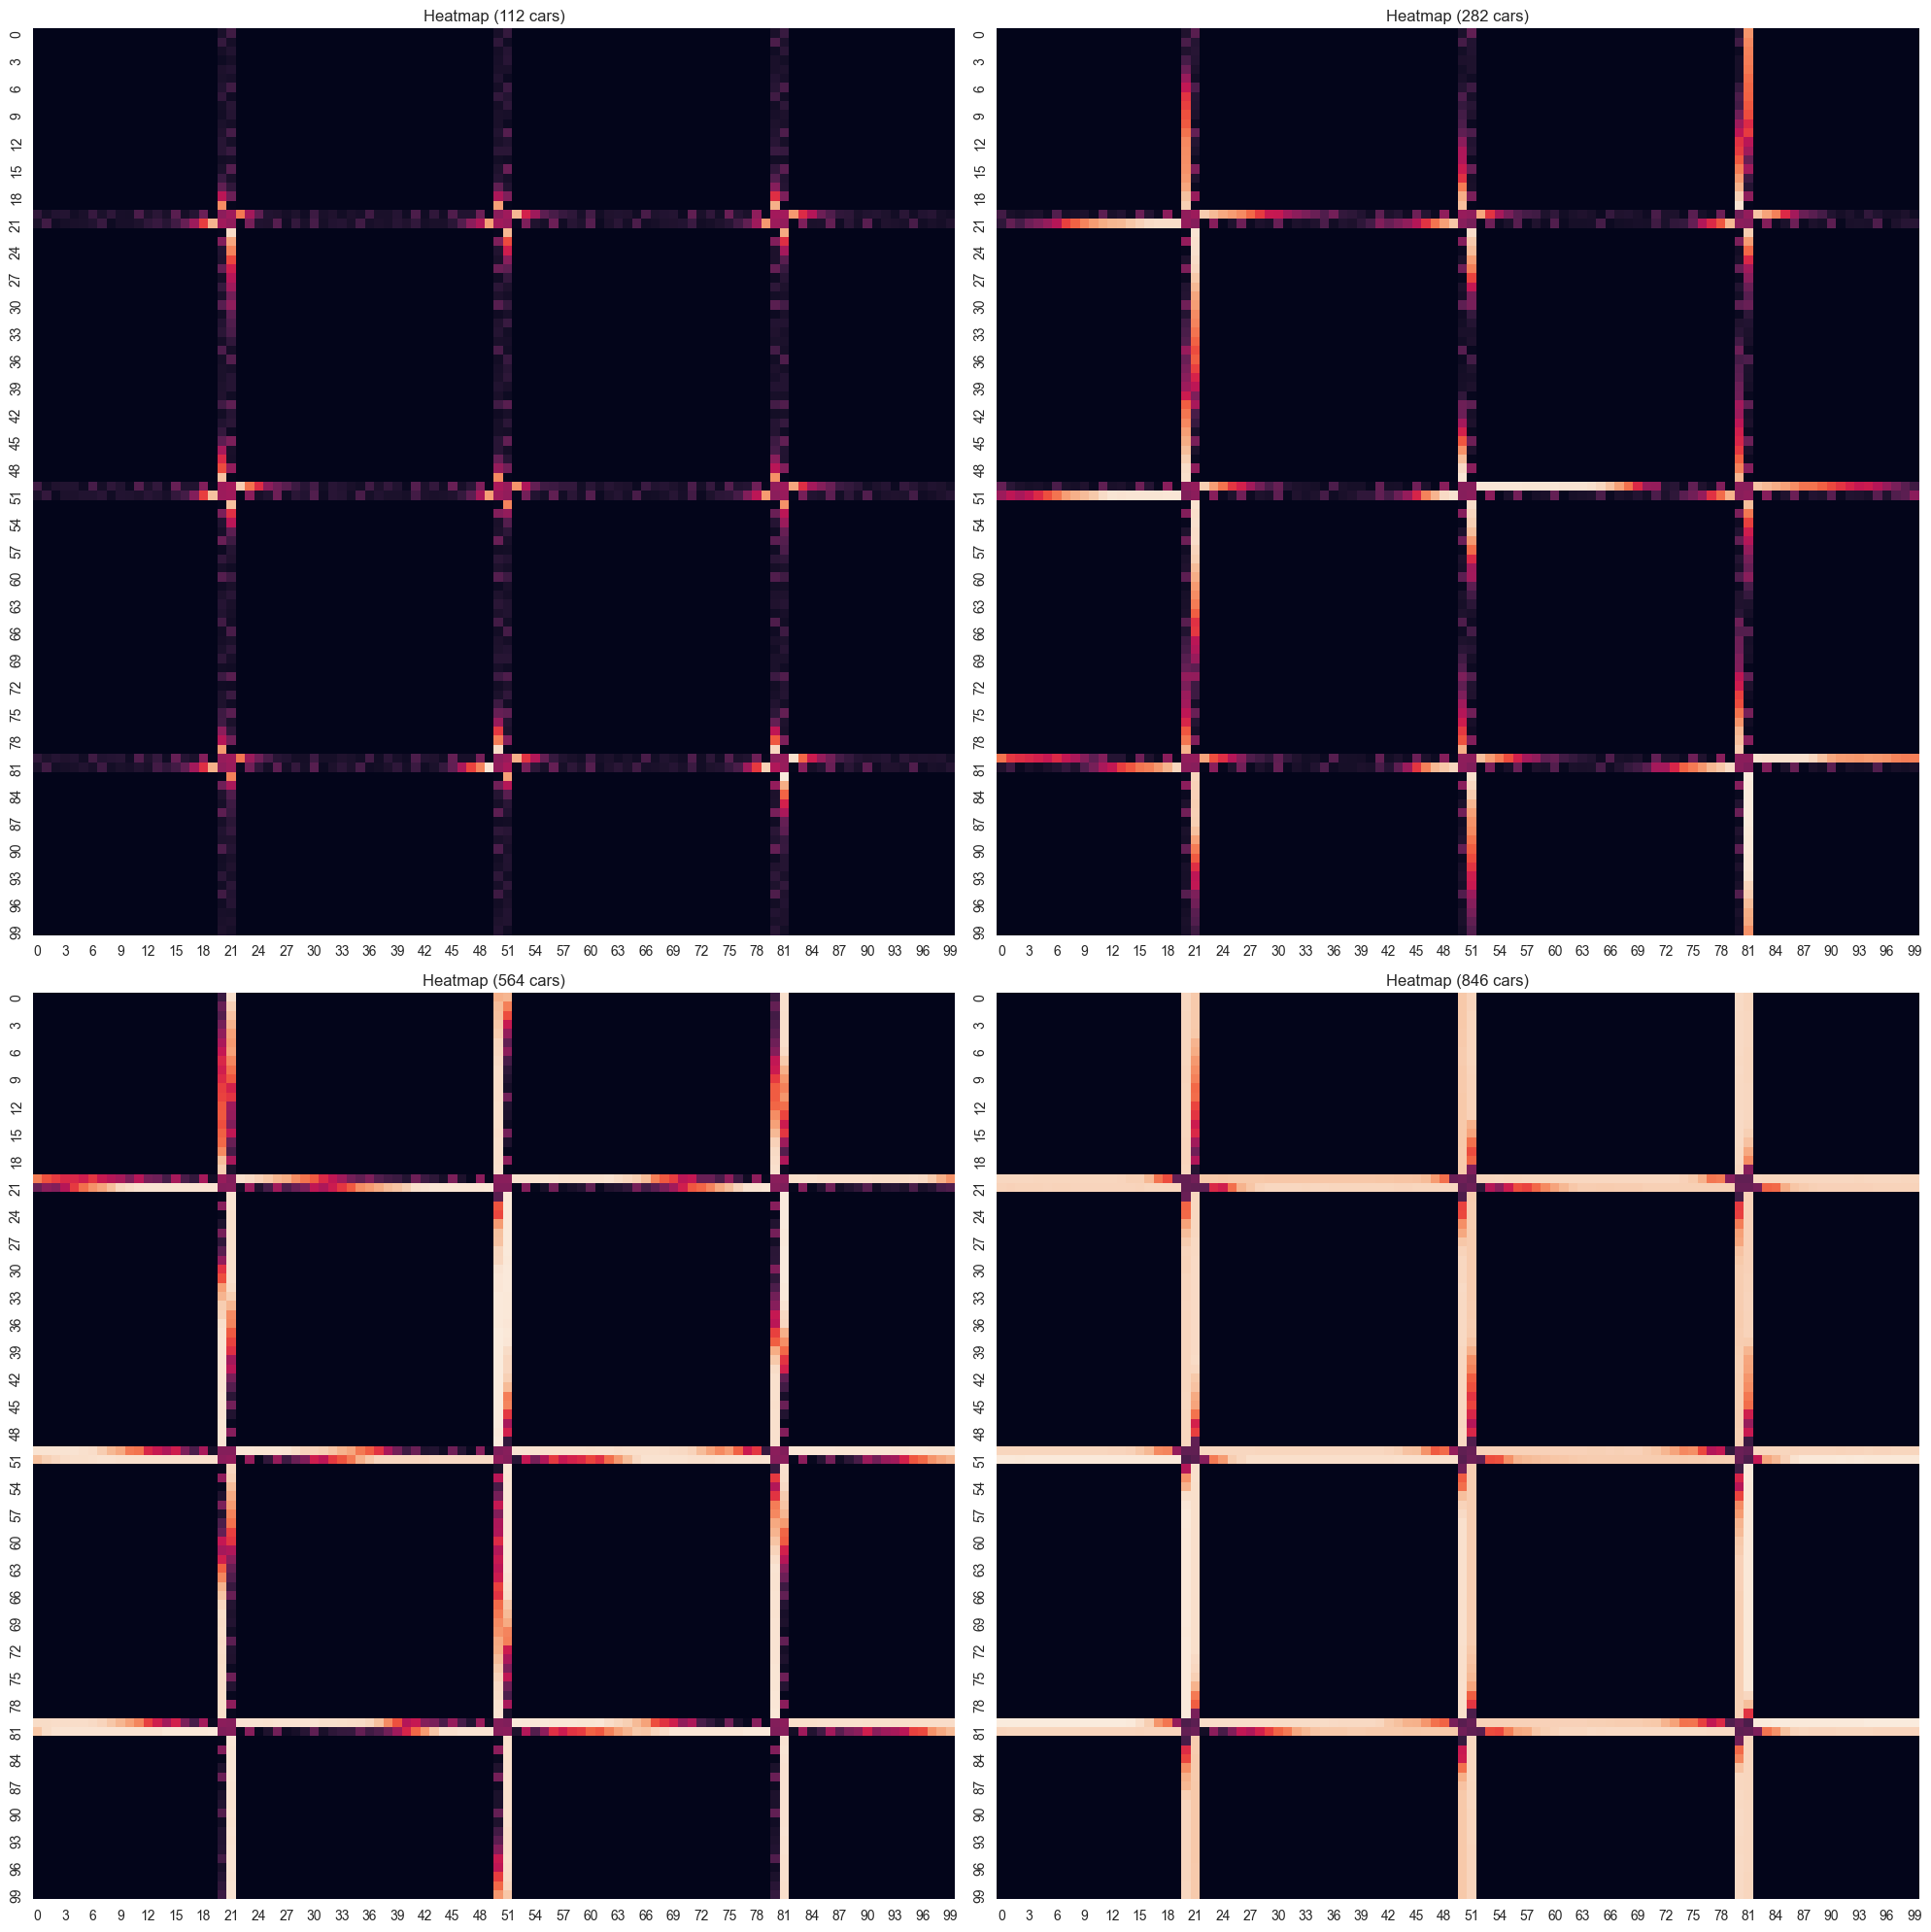

In [6]:
s.generate_heatmaps(heat_map_lists, cars_numbers, True, 'heatmaps_no_lights')

Wizualizacja poglądowa nie koniecznie poprawna.

## Average time to travel specified distances

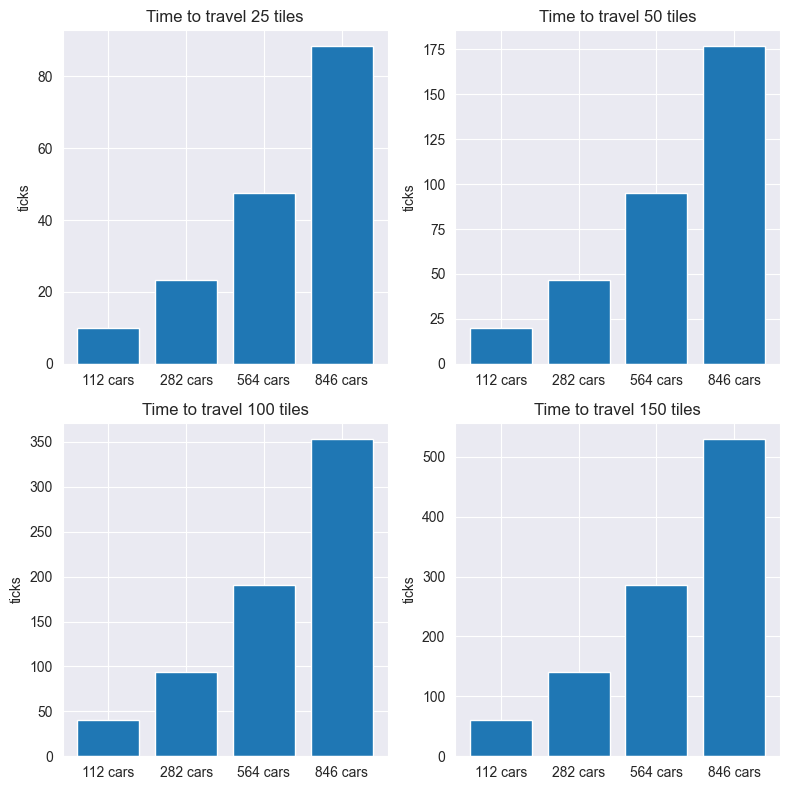

In [7]:
s.generate_travel_time_plots(average_section_travel_time_lists, cars_numbers, distances, True, 'travel_time_no_lights')

The graphs show the average travel times of specific length sections. It can be seen that as the number of cars increases, the travel times also increase.

The general conclusions are quite obvious with more traffic on the roads traffic efficiency decreases which affects traffic jams, and this affects average travel times or speeds. It seems that up to the second case studied (25%), car traffic is fairly stable and just going, while in the following cases cars rather stand in traffic jams and hardly move at all.


# Simulating different scenarios (lights times)

In [8]:
cars_numbers = [112, 282, 564, 846]
distances = [25, 50, 100, 150]
mean_vs_lists = []
stop_cars_lists = []
moving_cars_list = []
heat_map_lists = []
average_section_travel_time_lists = []
lights_times = [5, 10, 15]
TICKS = 500
V_MAX = 6


# loop through different scenarios (cars number on map)
for lights_time in lights_times:
    for cars_number in cars_numbers:
        CARS_NUMBER = cars_number
        map = Map(100)
        simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, lights=True, lights_time=lights_time, time=1)
        engine = Engine(simulation, map)

        mean_vs = []
        stop_cars = []
        moving_cars = []
        heat_map = engine.map.car_v_map
        times = []
        #loop simulation number of ticks
        for i in range(TICKS):
            engine.loop(time=1) # no need time here
            mean_vs.append(s.mean_v(engine.map.car_v_map, CARS_NUMBER))
            stop_cars.append(s.cars_stop_ratio(engine.map.car_v_map, CARS_NUMBER))
            moving_cars.append((s.cars_move_ratio(engine.map.car_v_map, CARS_NUMBER)))
            heat_map += engine.map.car_v_map

        #calculation of travel times
        for distance in distances:
            time = s.average_section_travel_time(engine.simulation.cars, distance, CARS_NUMBER, TICKS)
            times.append(time)

        #updating lists (need for visualizations)
        mean_vs_lists.append(mean_vs)
        stop_cars_lists.append(stop_cars)
        moving_cars_list.append(moving_cars)
        heat_map_lists.append(heat_map)
        average_section_travel_time_lists.append(times)

## Average speed (lights time = 5)

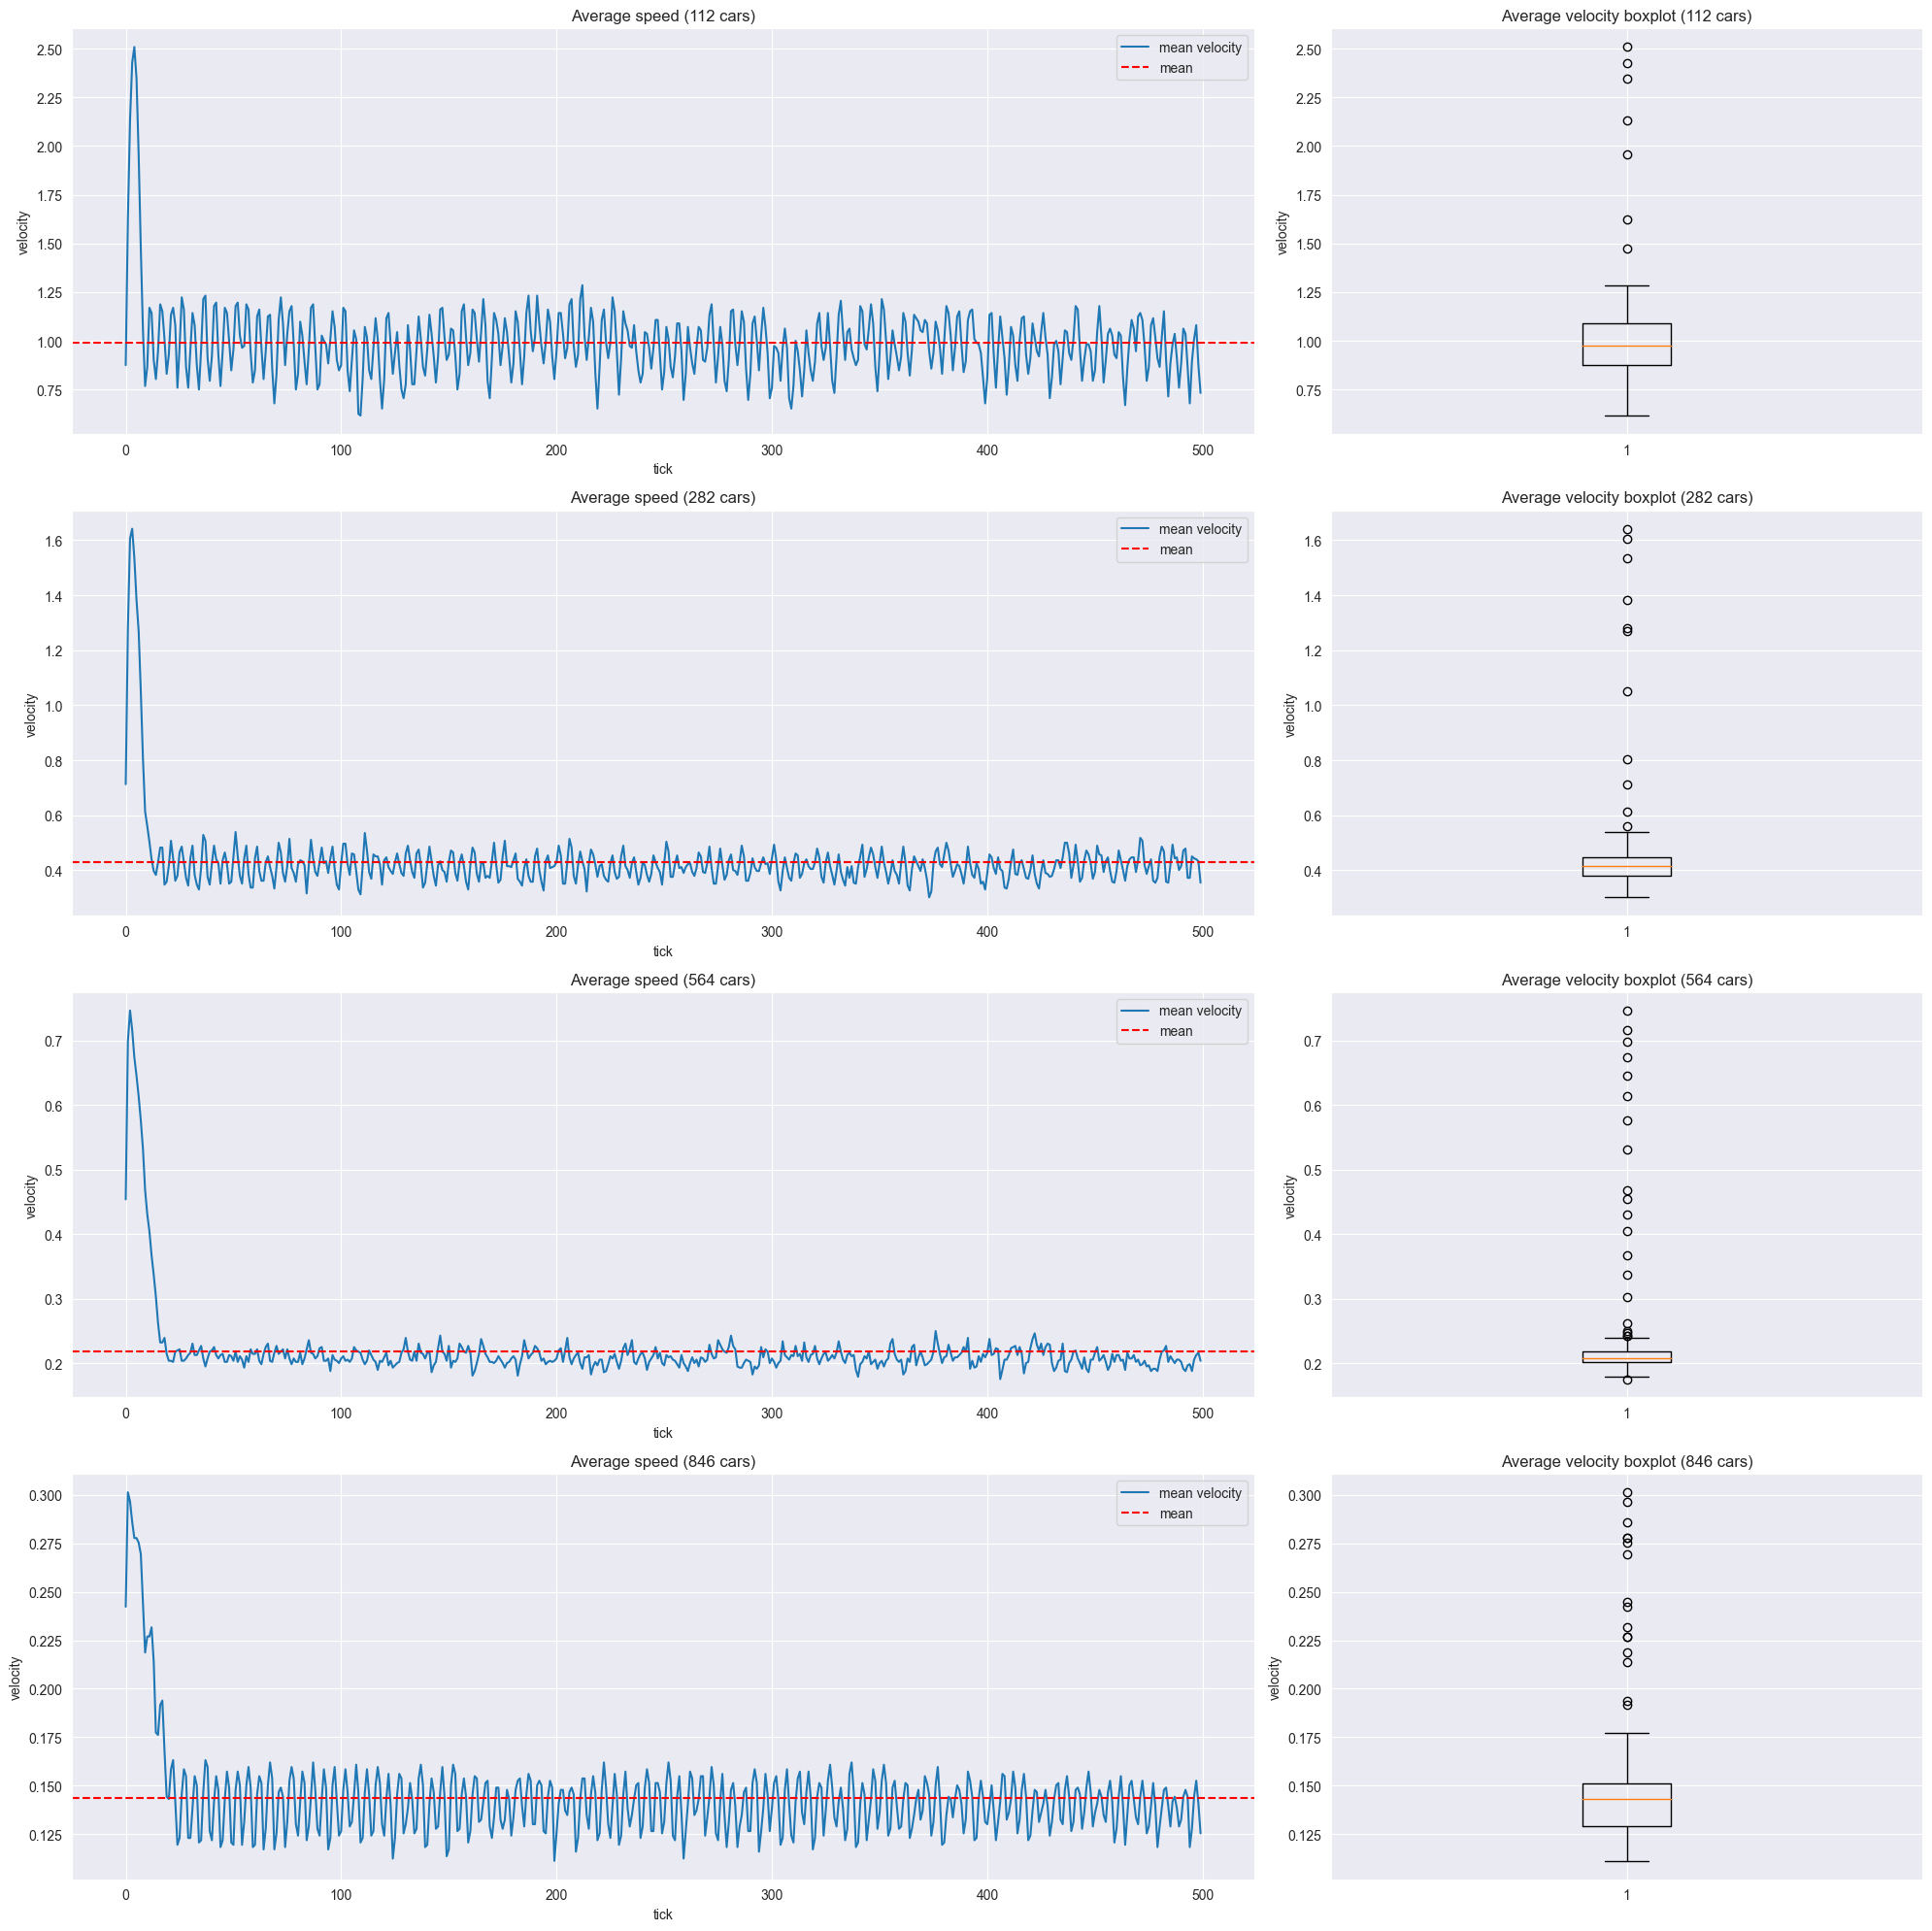

In [9]:
s.generate_average_speed_plots(mean_vs_lists[0:4], cars_numbers, True, 'Average_speed_lights_5')

## Average speed (lights time = 10)

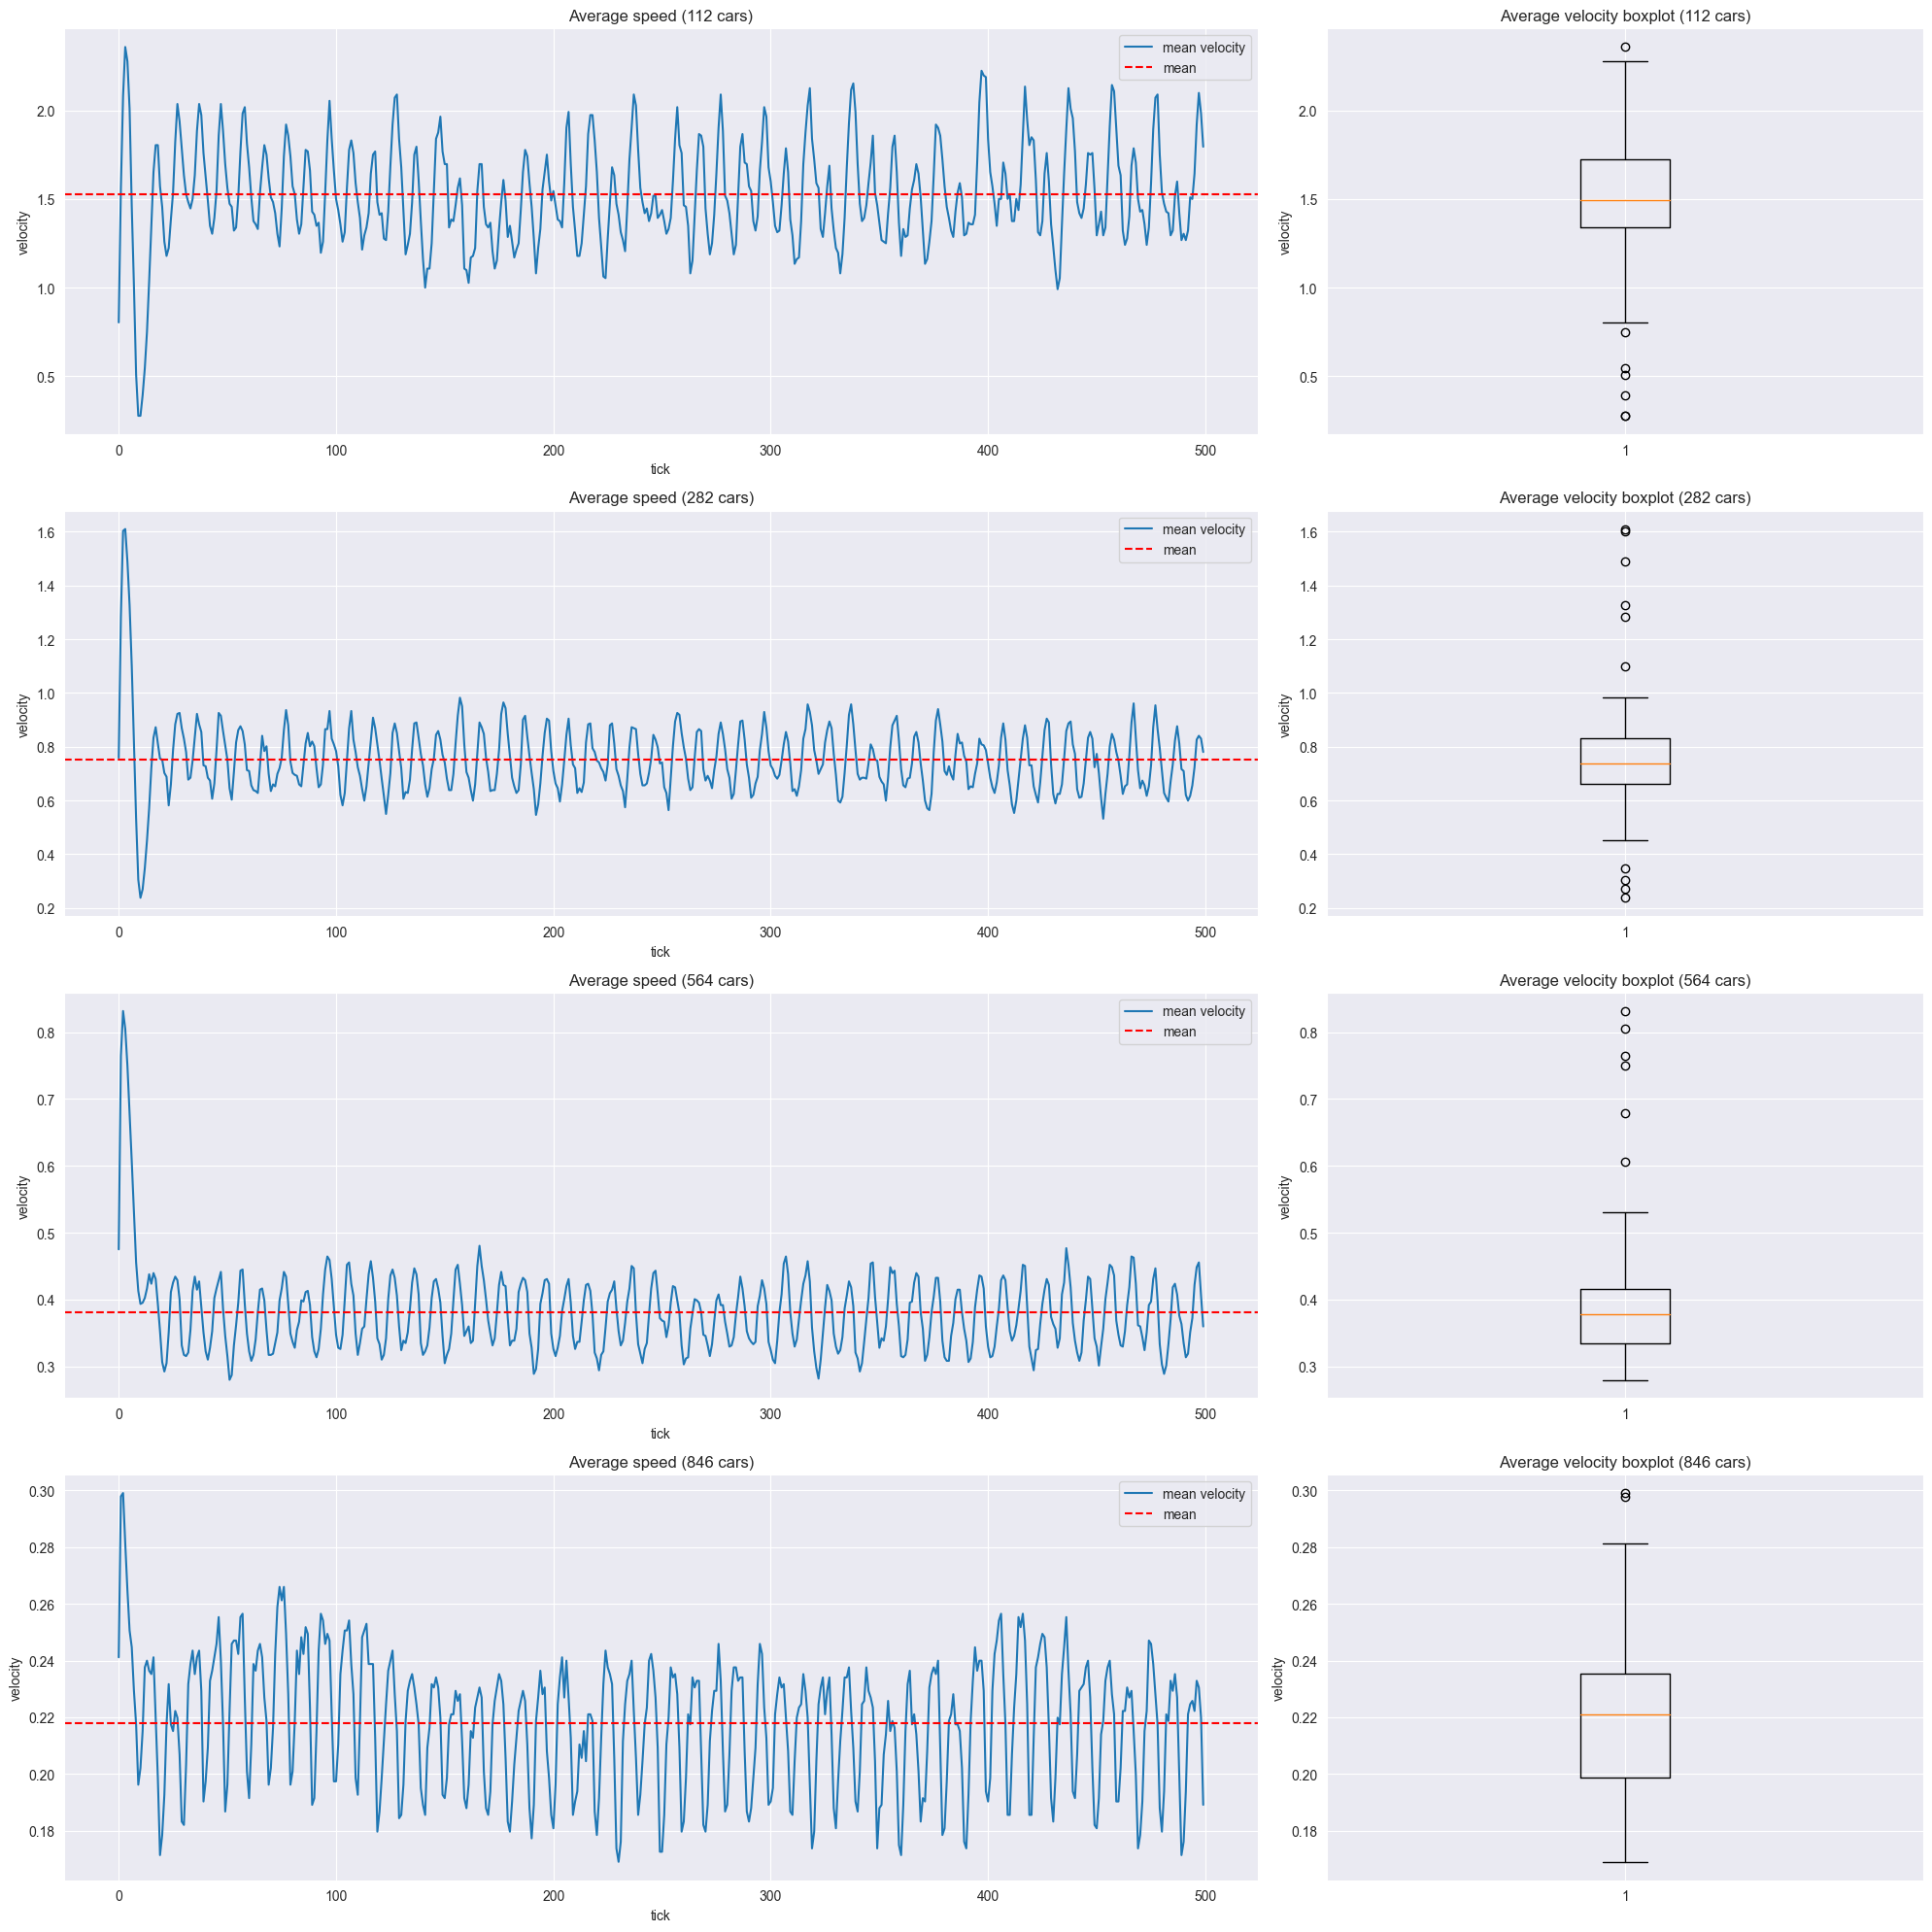

In [10]:
s.generate_average_speed_plots(mean_vs_lists[4:8], cars_numbers, True, 'Average_speed_lights_10')

## Average speed (lights time = 15)

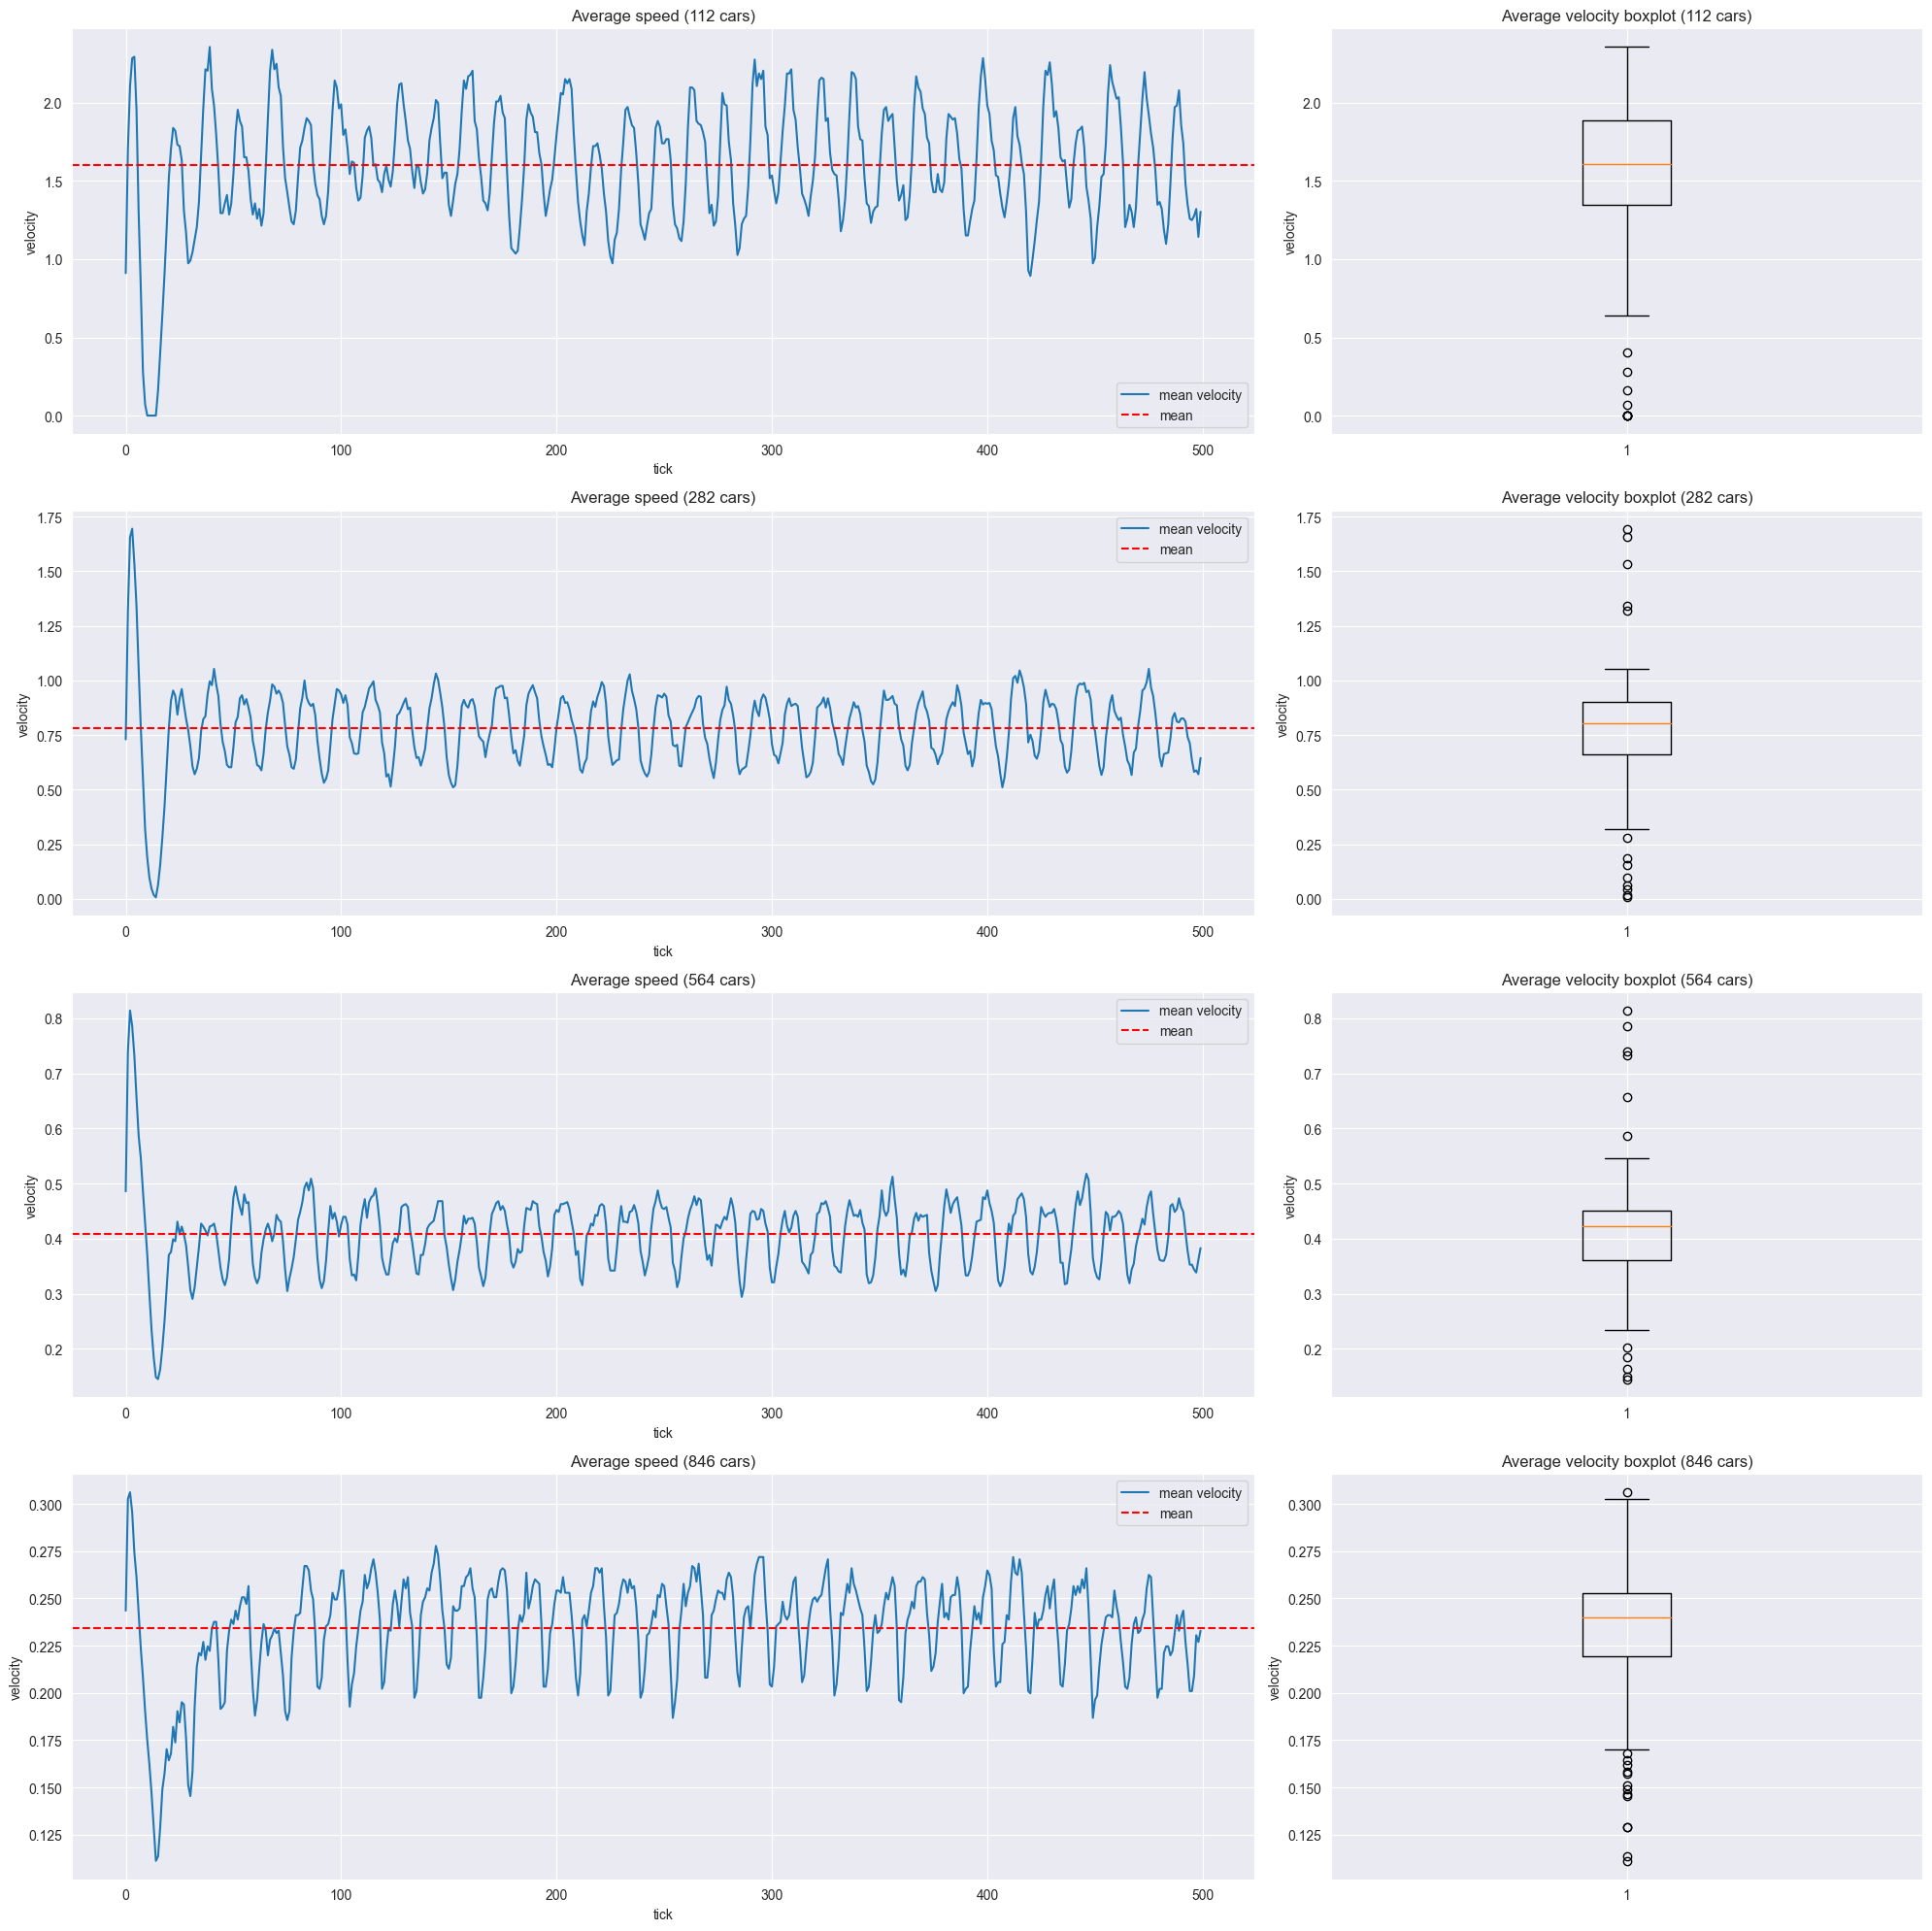

In [11]:
s.generate_average_speed_plots(mean_vs_lists[8:12], cars_numbers, True, 'Average_speed_lights_15')

As the length of the lights increases, the average speed of moving cars increases. The scatter of values around the average also increases. Compared to the average speeds in the case of the simulation without lights, we can see a certain repetitiveness (seasonality, period) in the graph when the values rise and fall in a similar way, while in the simulation without lights this happened more irregularly. This situation is due to the lights, which manage traffic in a systematic way. The graphs also show a decrease in the frequency of these deviations as the length of the lights increases, which confirms the impact of the operation of traffic lights on traffic.

## Stop/Moving cars (lights time = 5)

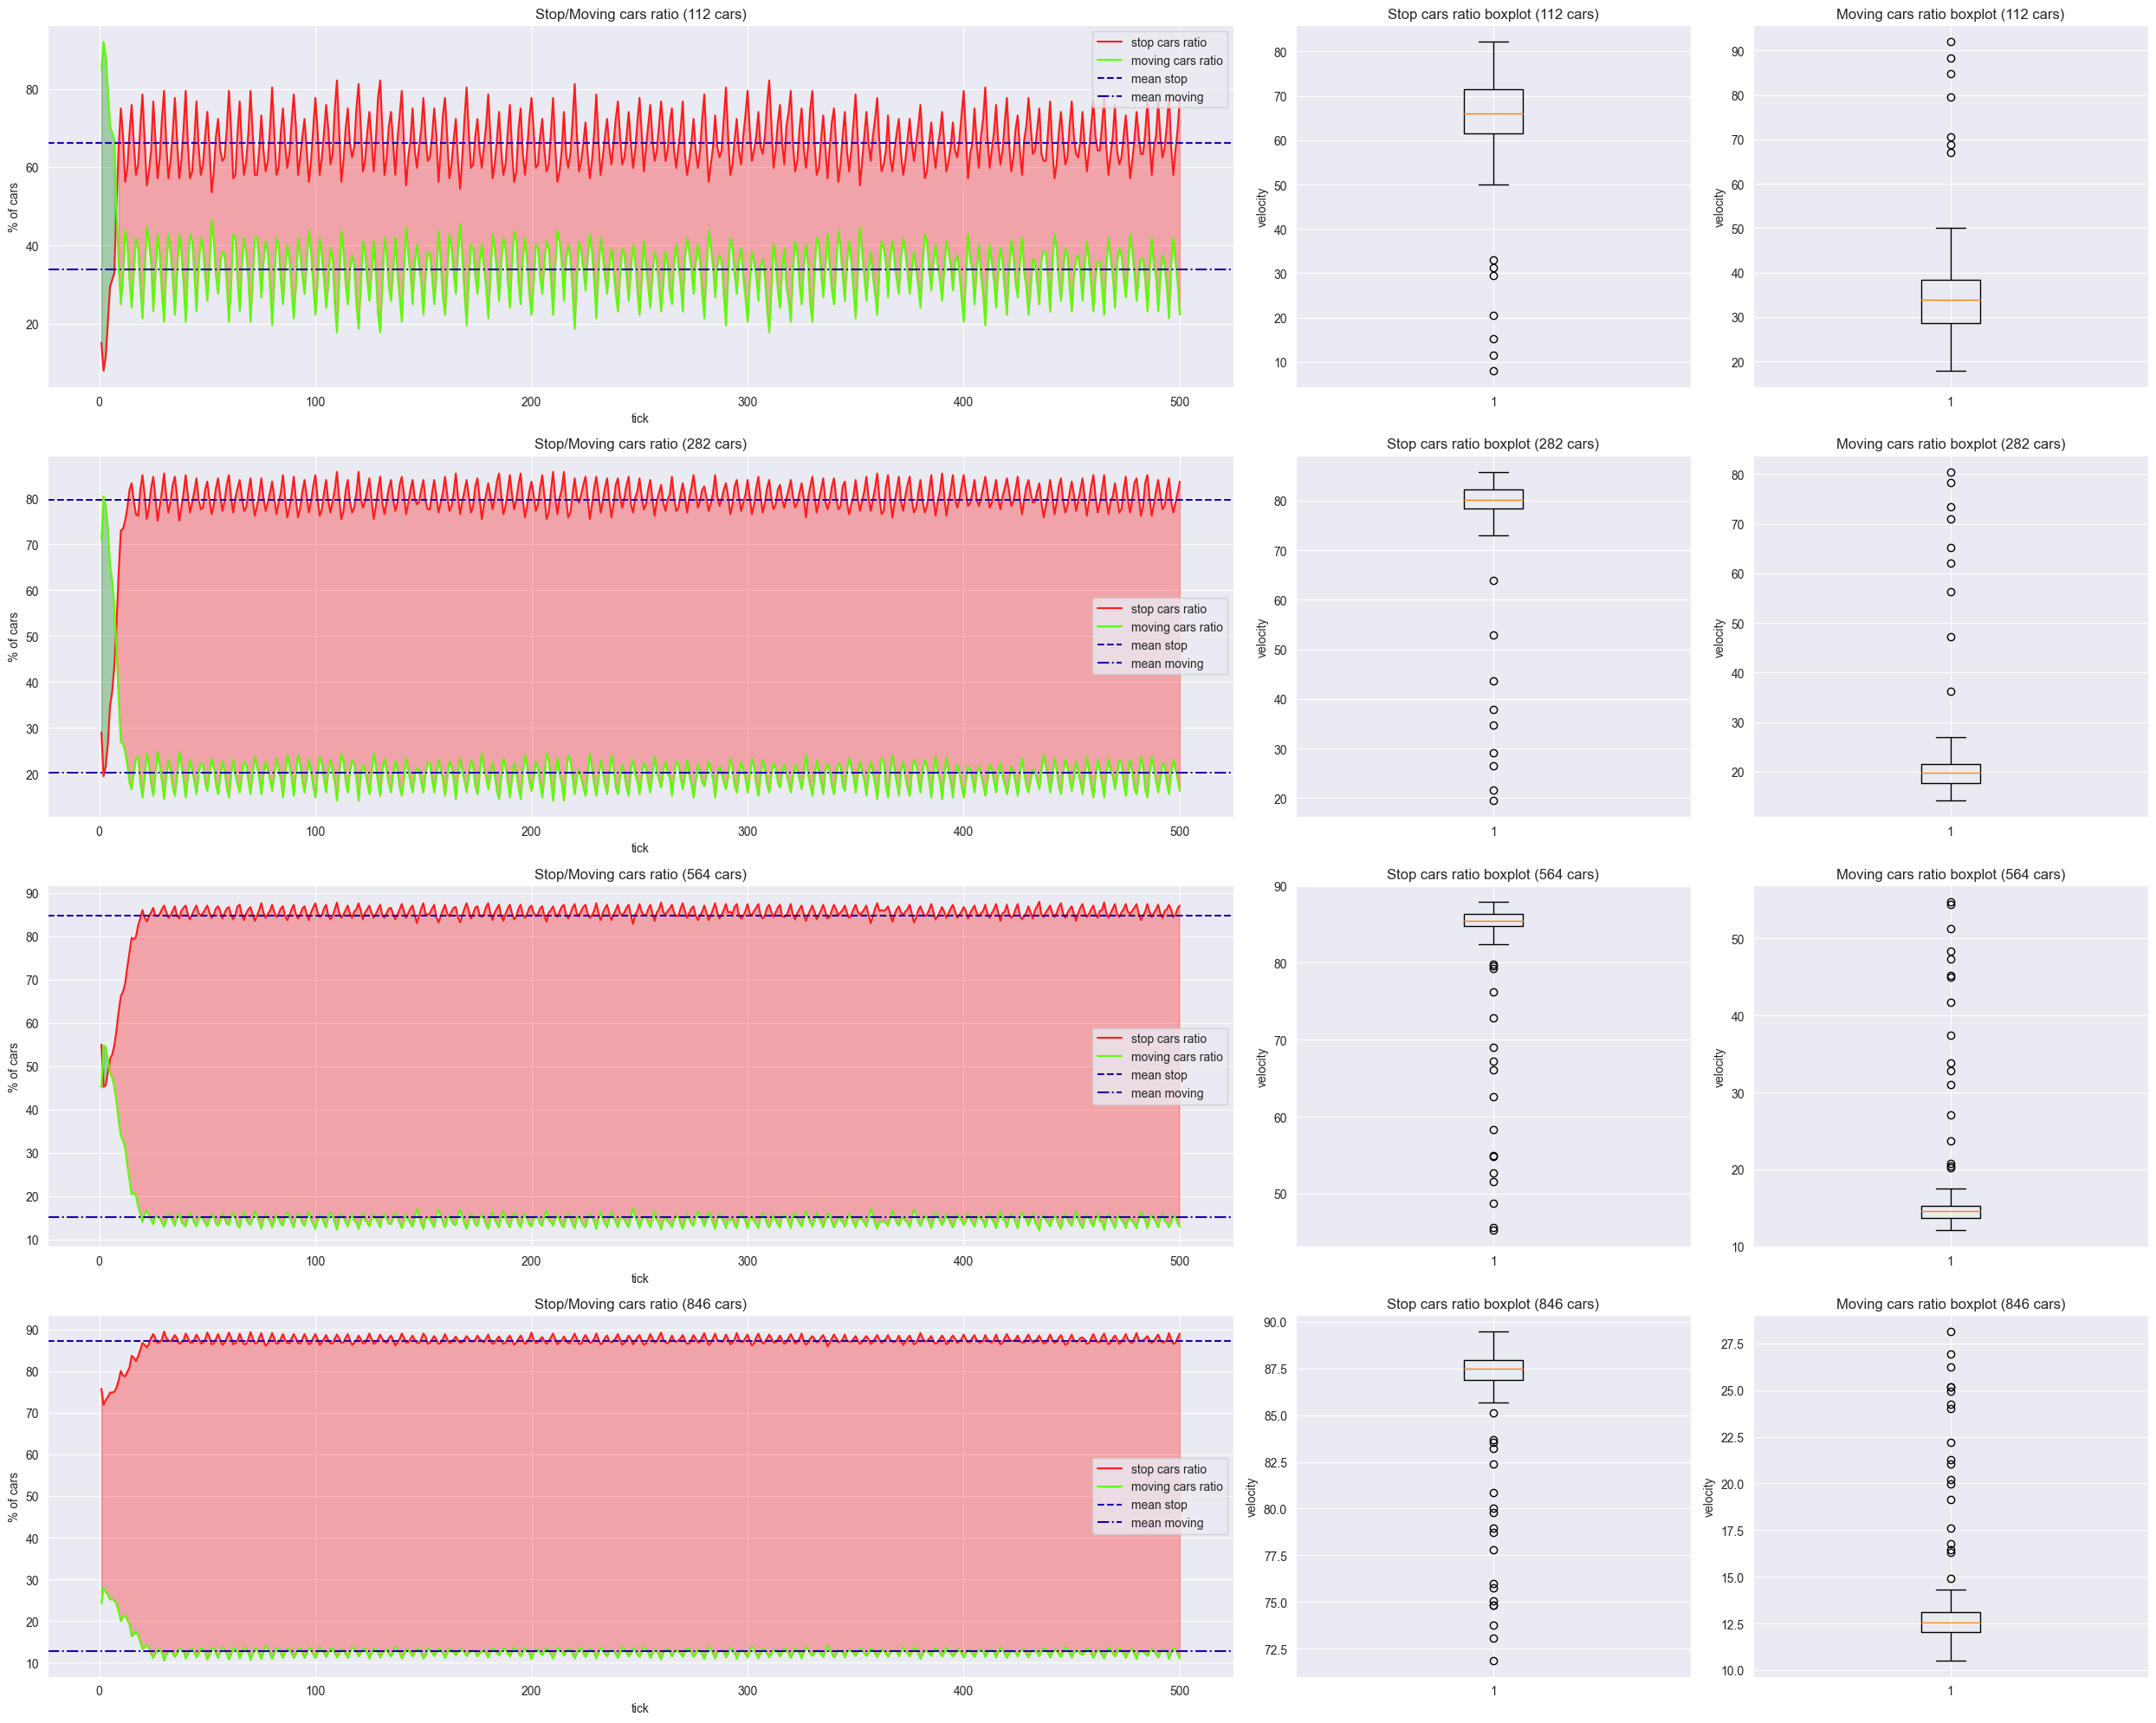

In [12]:
s.generate_stop_moving_cars_plots(stop_cars_lists[0:4], moving_cars_list[0:4], cars_numbers, TICKS, True, 'Stop_moving_cars_lights_5')

## Stop/Moving cars (lights time = 10)

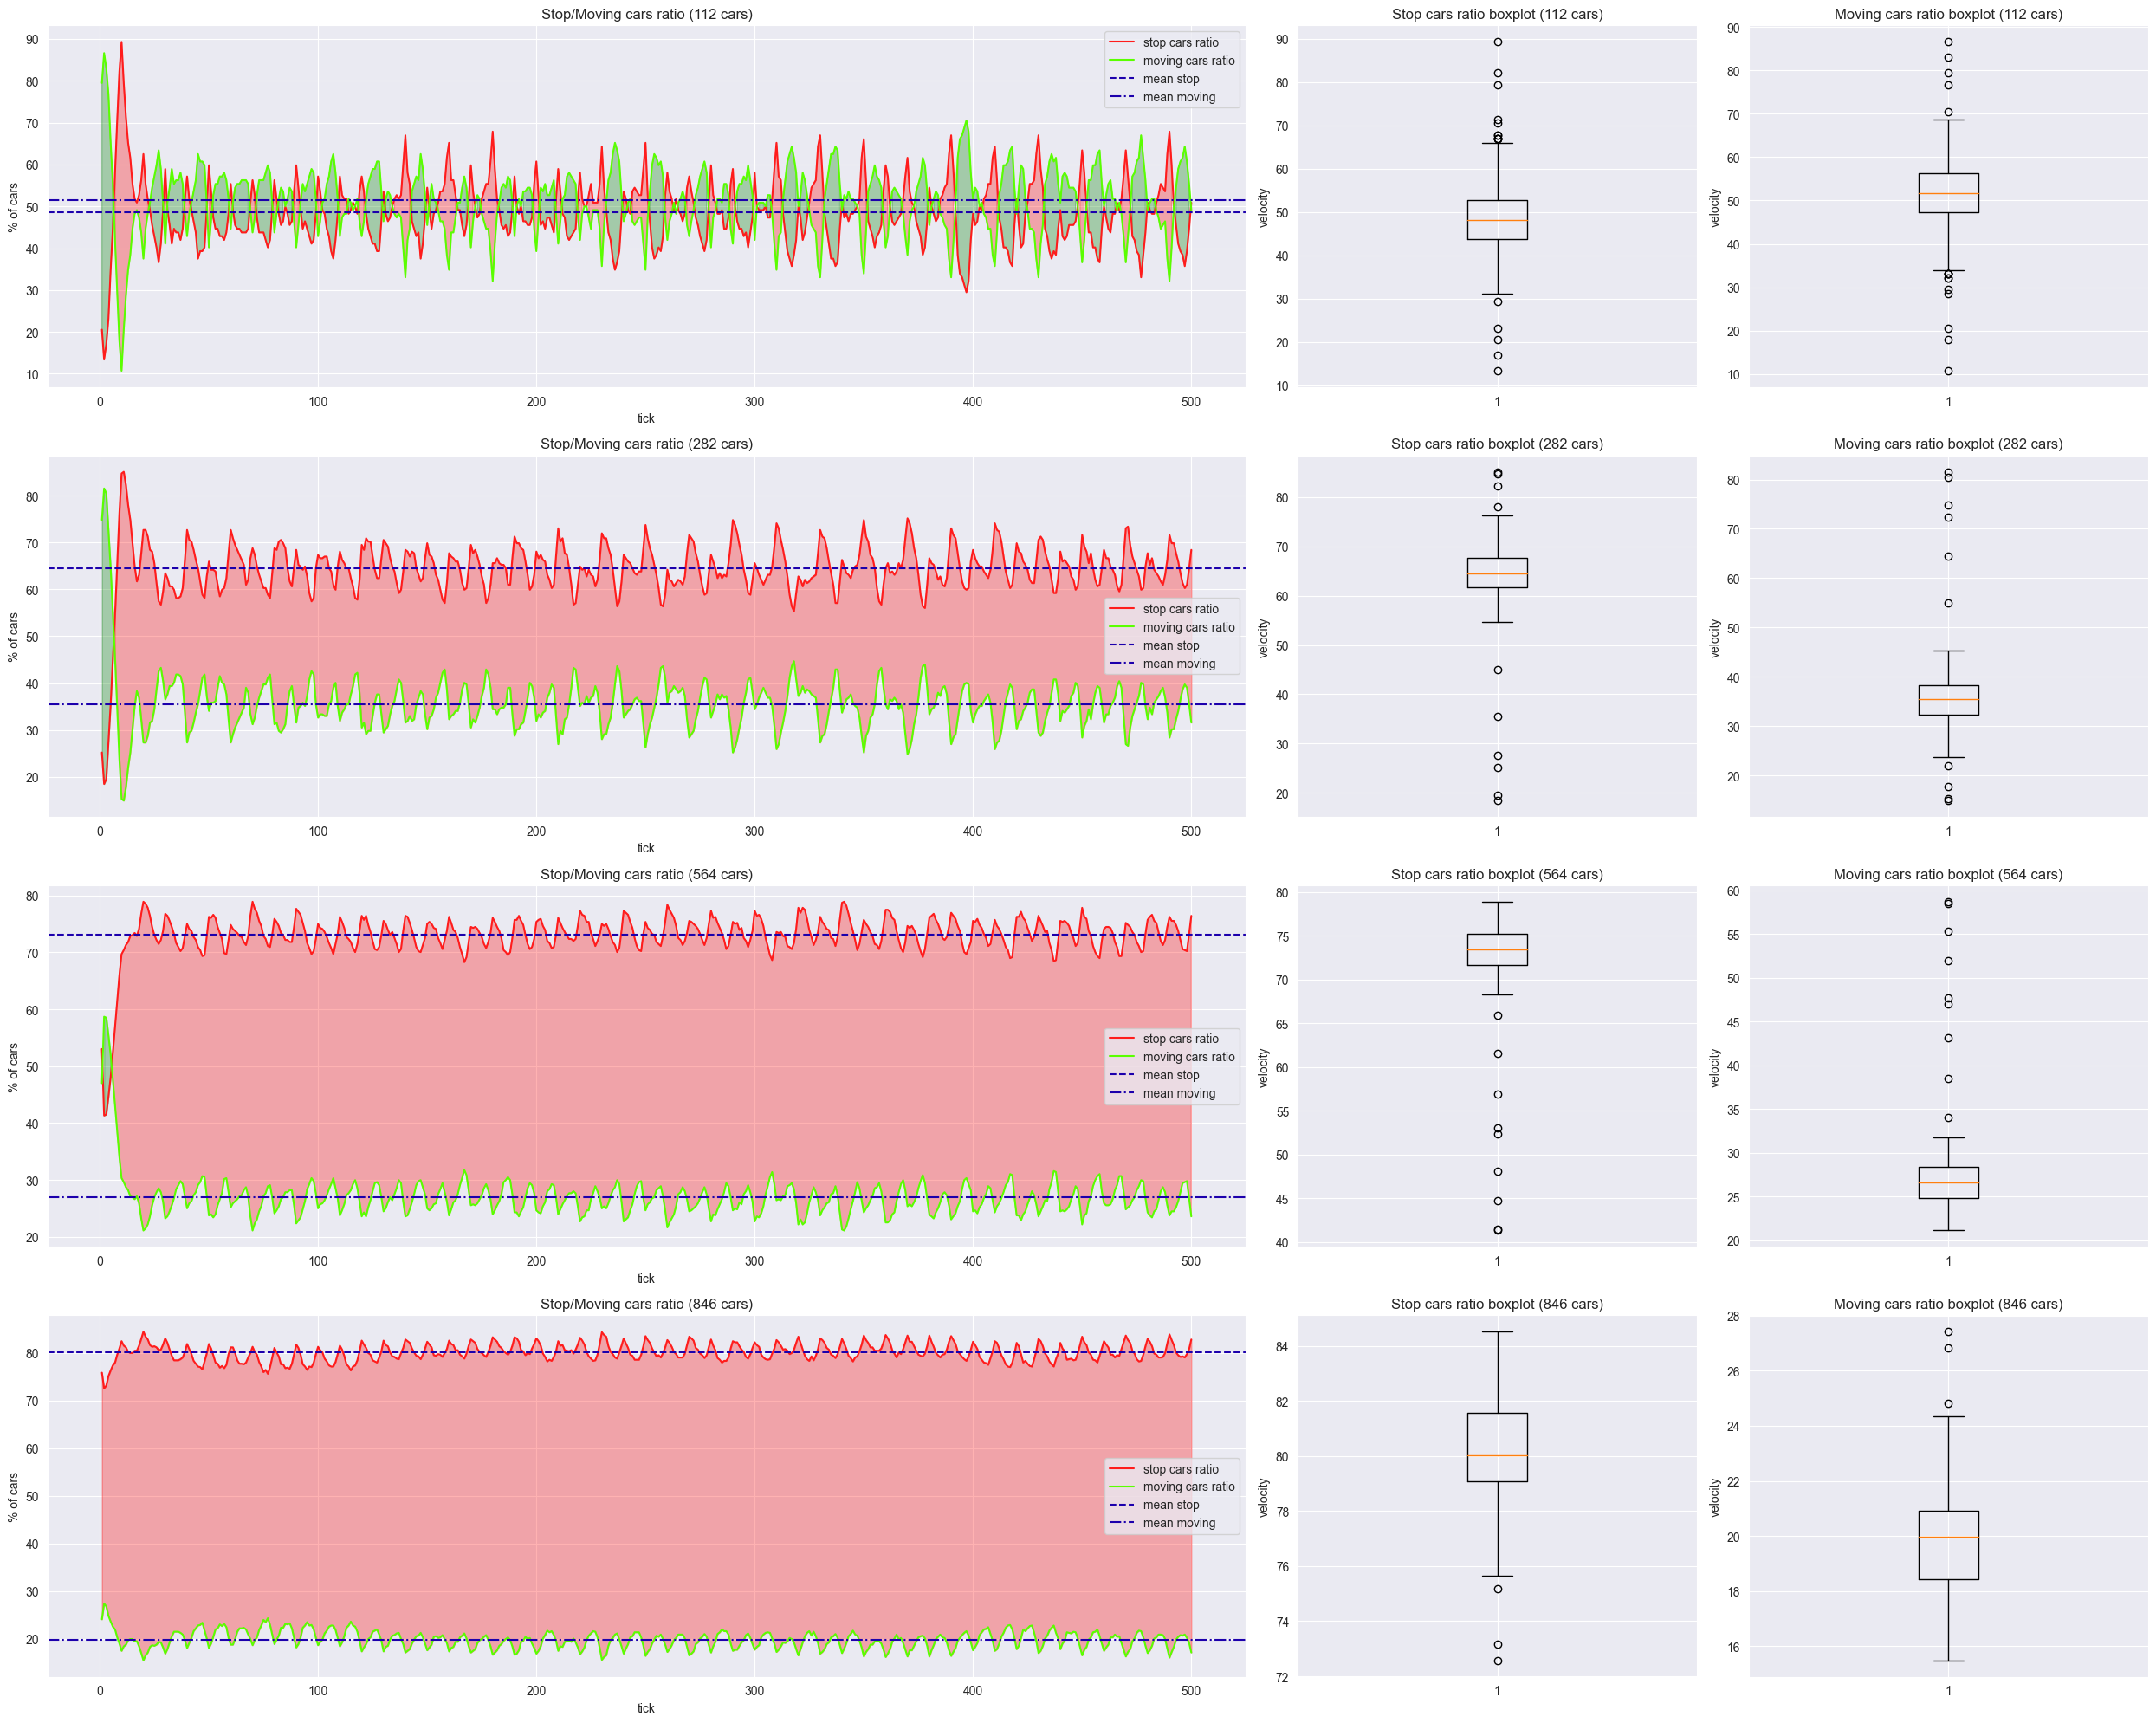

In [13]:
s.generate_stop_moving_cars_plots(stop_cars_lists[4:8], moving_cars_list[4:8], cars_numbers, TICKS, True, 'Stop_moving_cars_lights_10')

## Stop/Moving cars (lights time = 15)

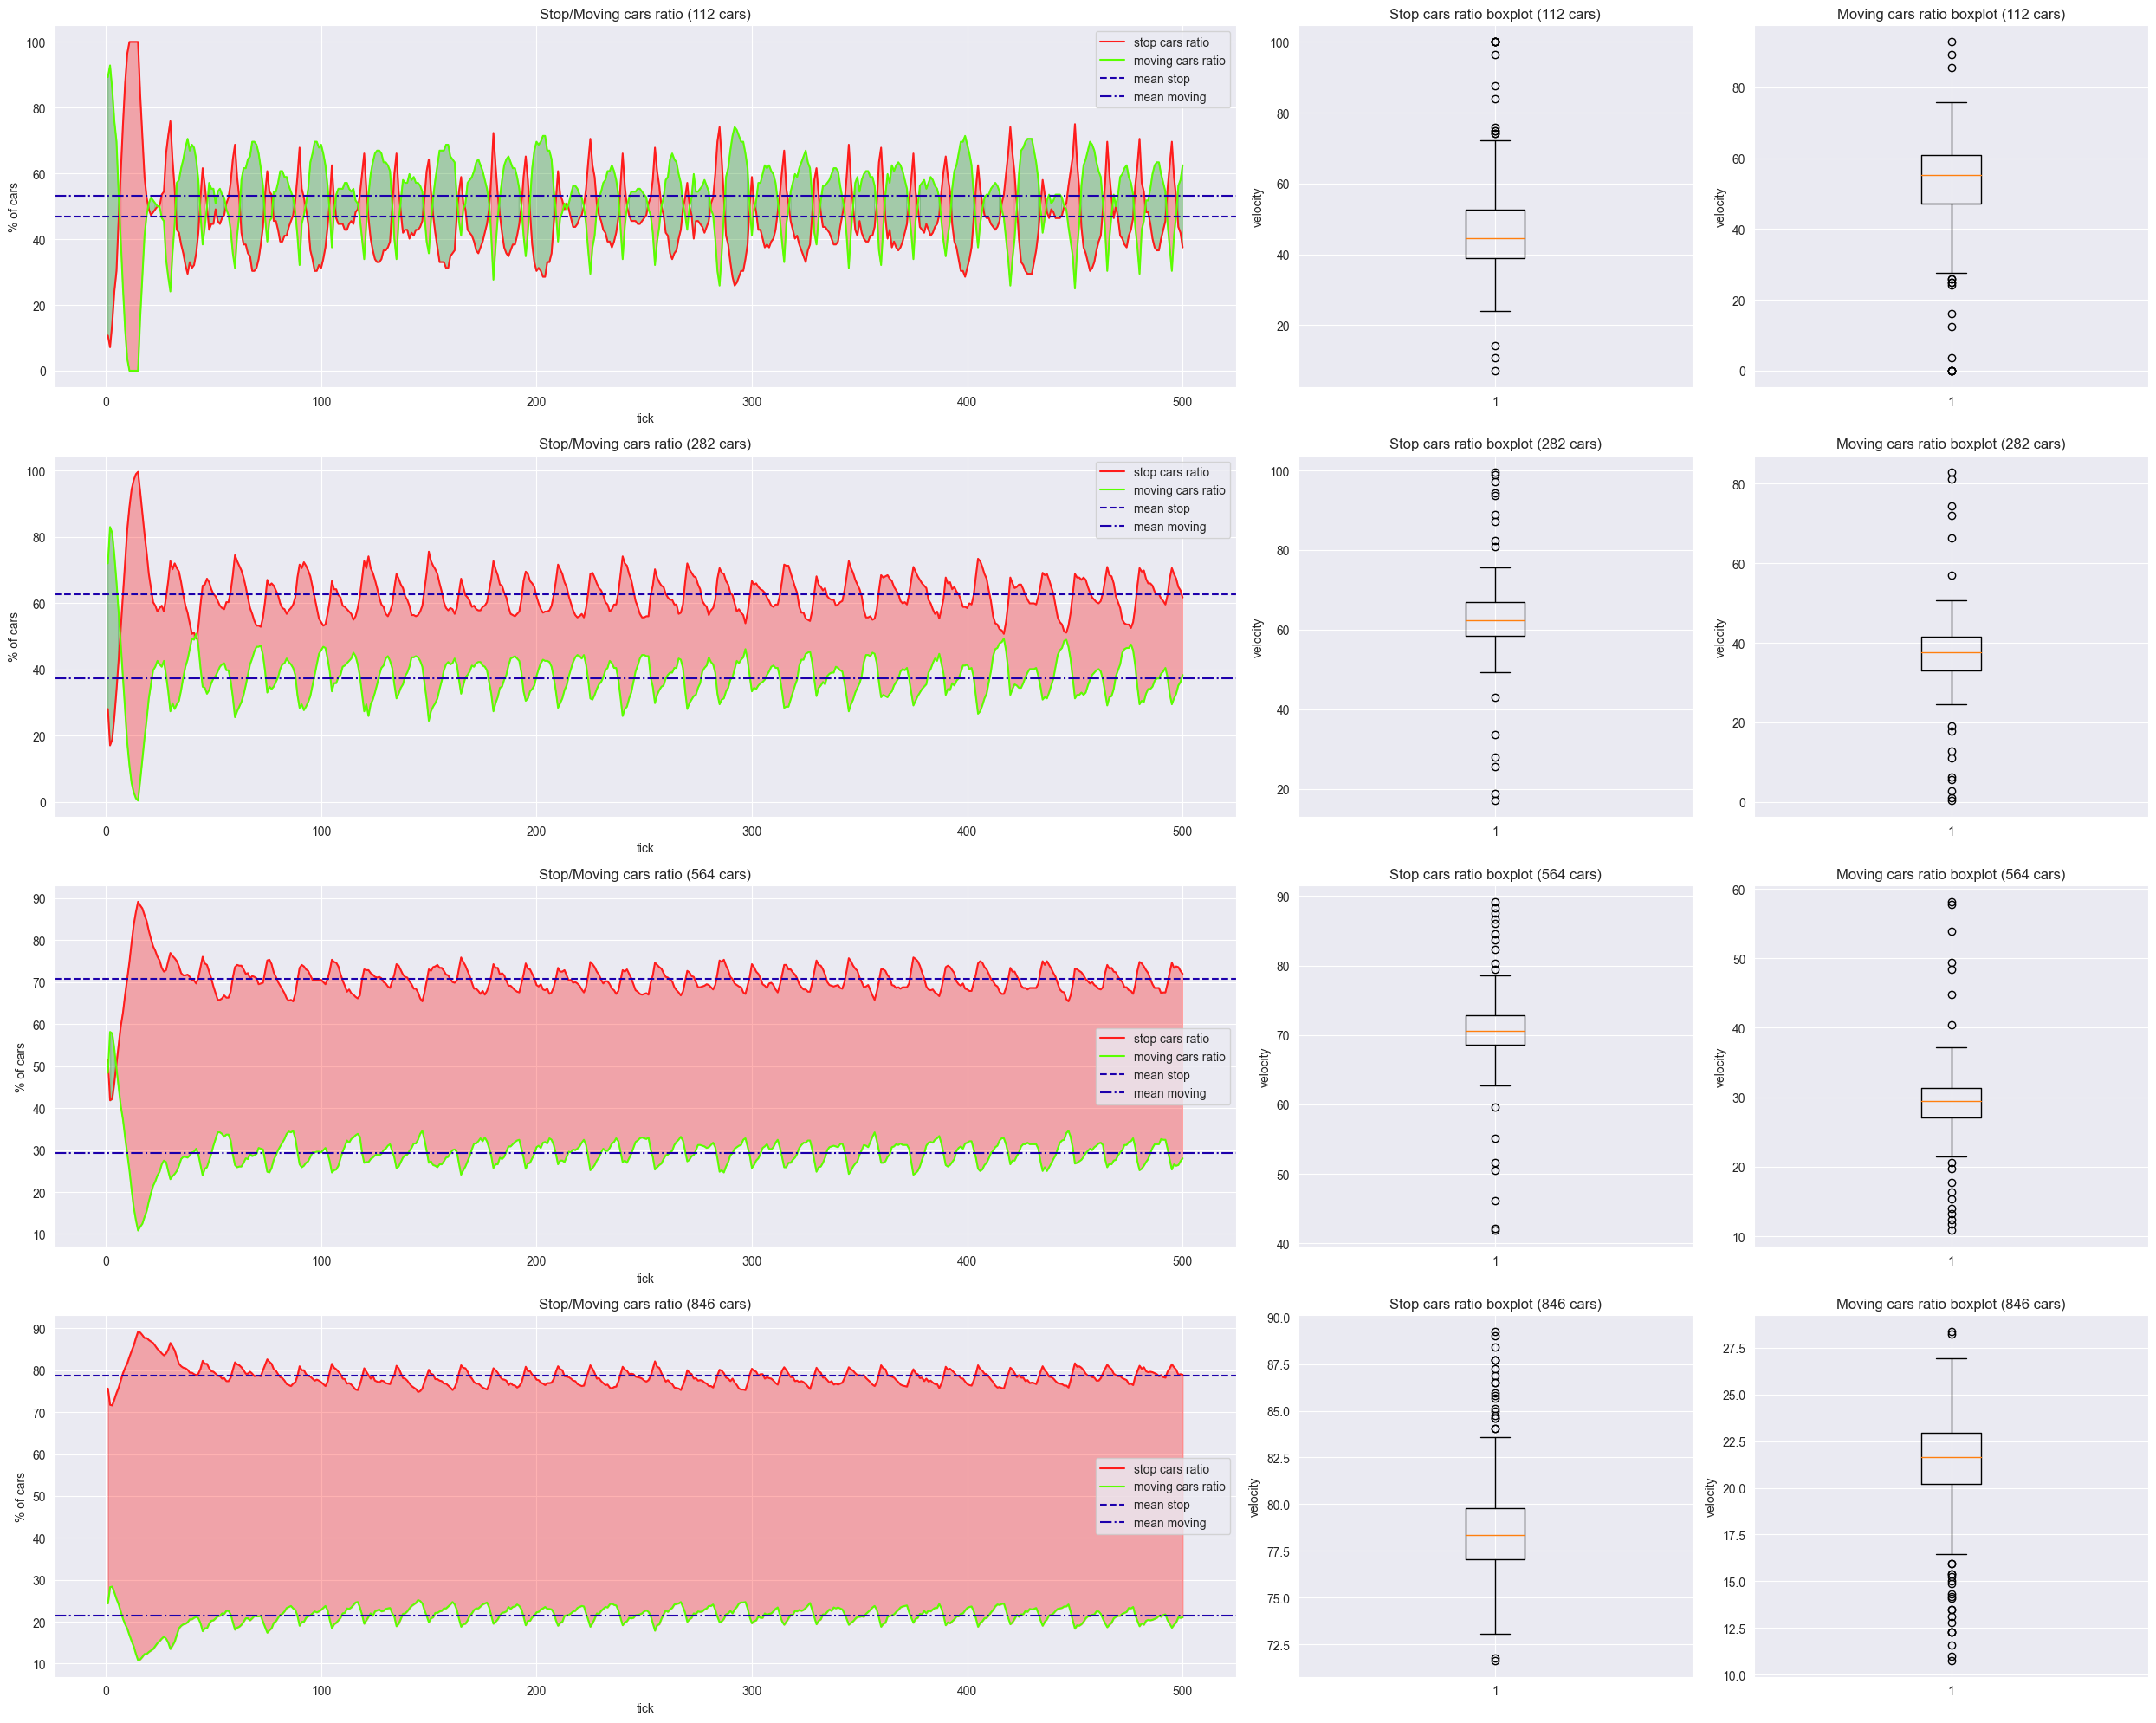

In [14]:
s.generate_stop_moving_cars_plots(stop_cars_lists[8:12], moving_cars_list[8:12], cars_numbers, TICKS, True, 'Stop_moving_cars_lights_15')

Increasing the length of traffic lights has the effect of decreasing the disparity between the % of moving cars and the % of standing cars. The general pattern is consistent with intuition. In the case of a smaller number of cars, the disparity, is the smallest and increases as the number of cars on the map increases. Interestingly, in the case of lights of length 5 for the entire duration of the situation in all cases of congestion, a higher percentage of the total number of cars are standing in traffic jams than moving. As the length of time increases, at least in the case of the least congestion, this situation changes and reaches parity and even an advantage of cars moving over those standing in traffic jams. This gives a certain conclusion that too short a light time rather negatively affects traffic. Interestingly, it turns out that the simulation without lights at least in this regard obtained better results.

## Heatmaps (lights time = 5)

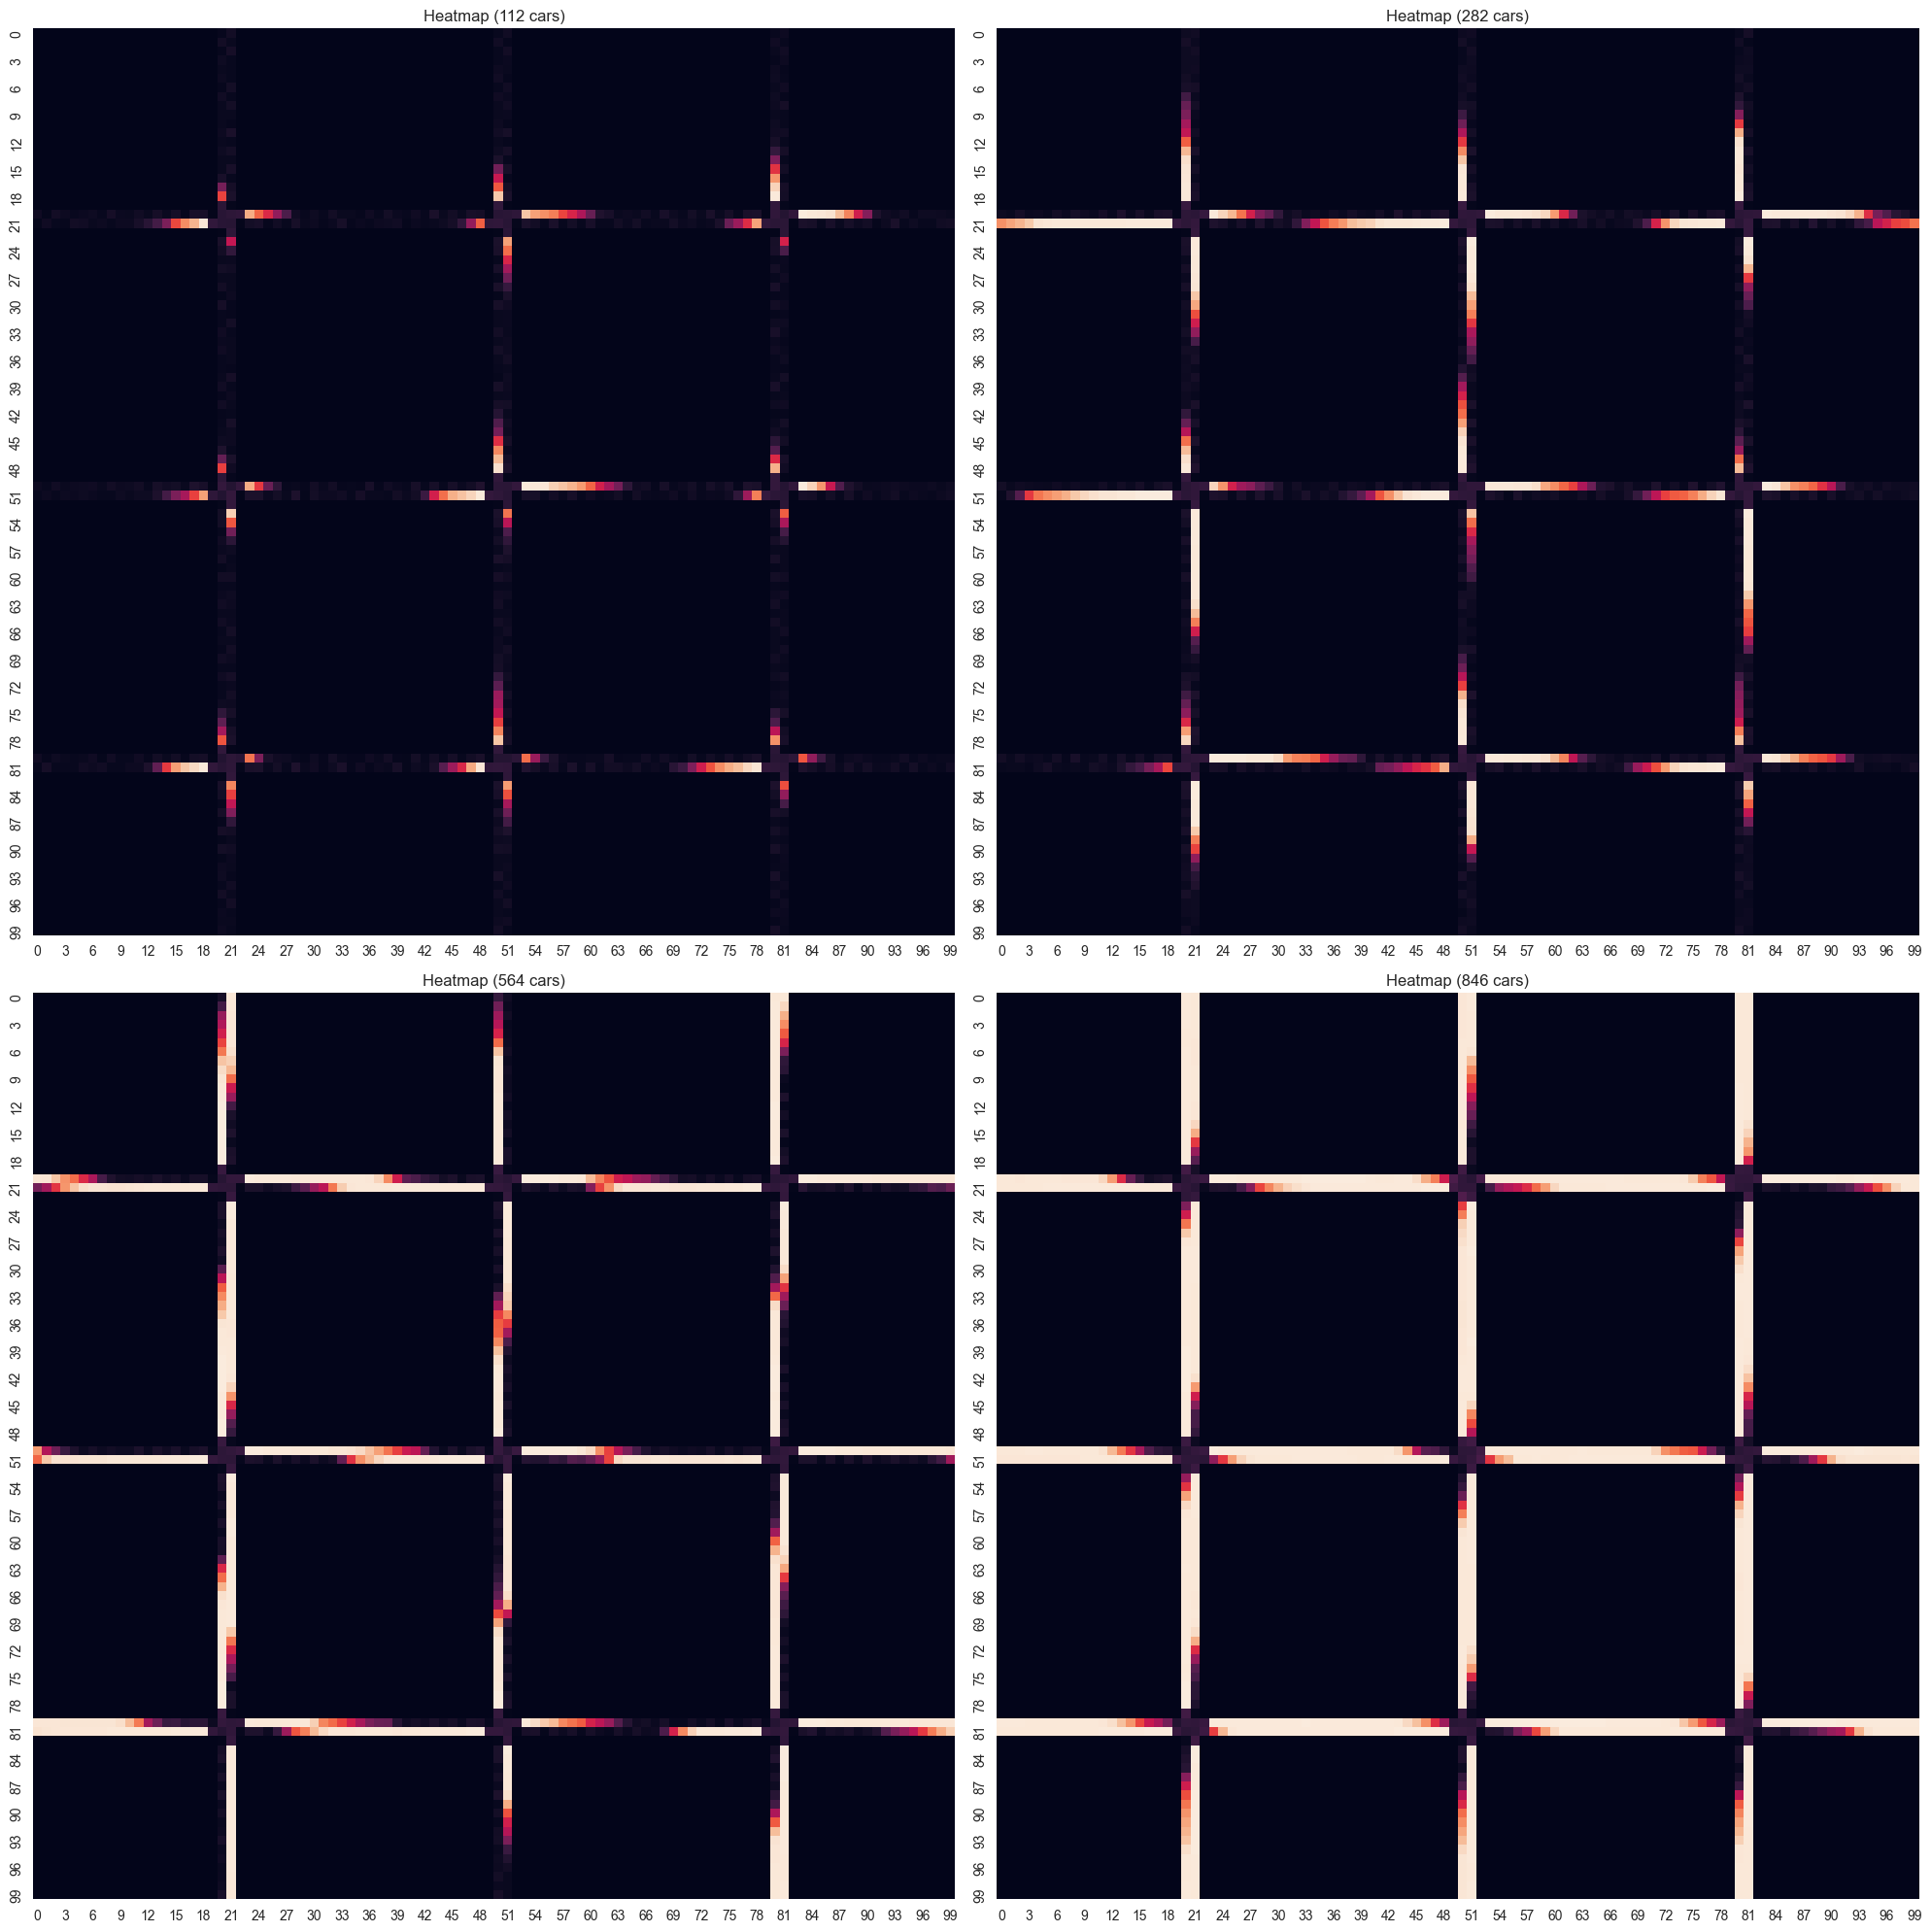

In [15]:
s.generate_heatmaps(heat_map_lists[0:4], cars_numbers, True, 'heatmaps_lights_5')

## Heatmaps (lights time = 10)

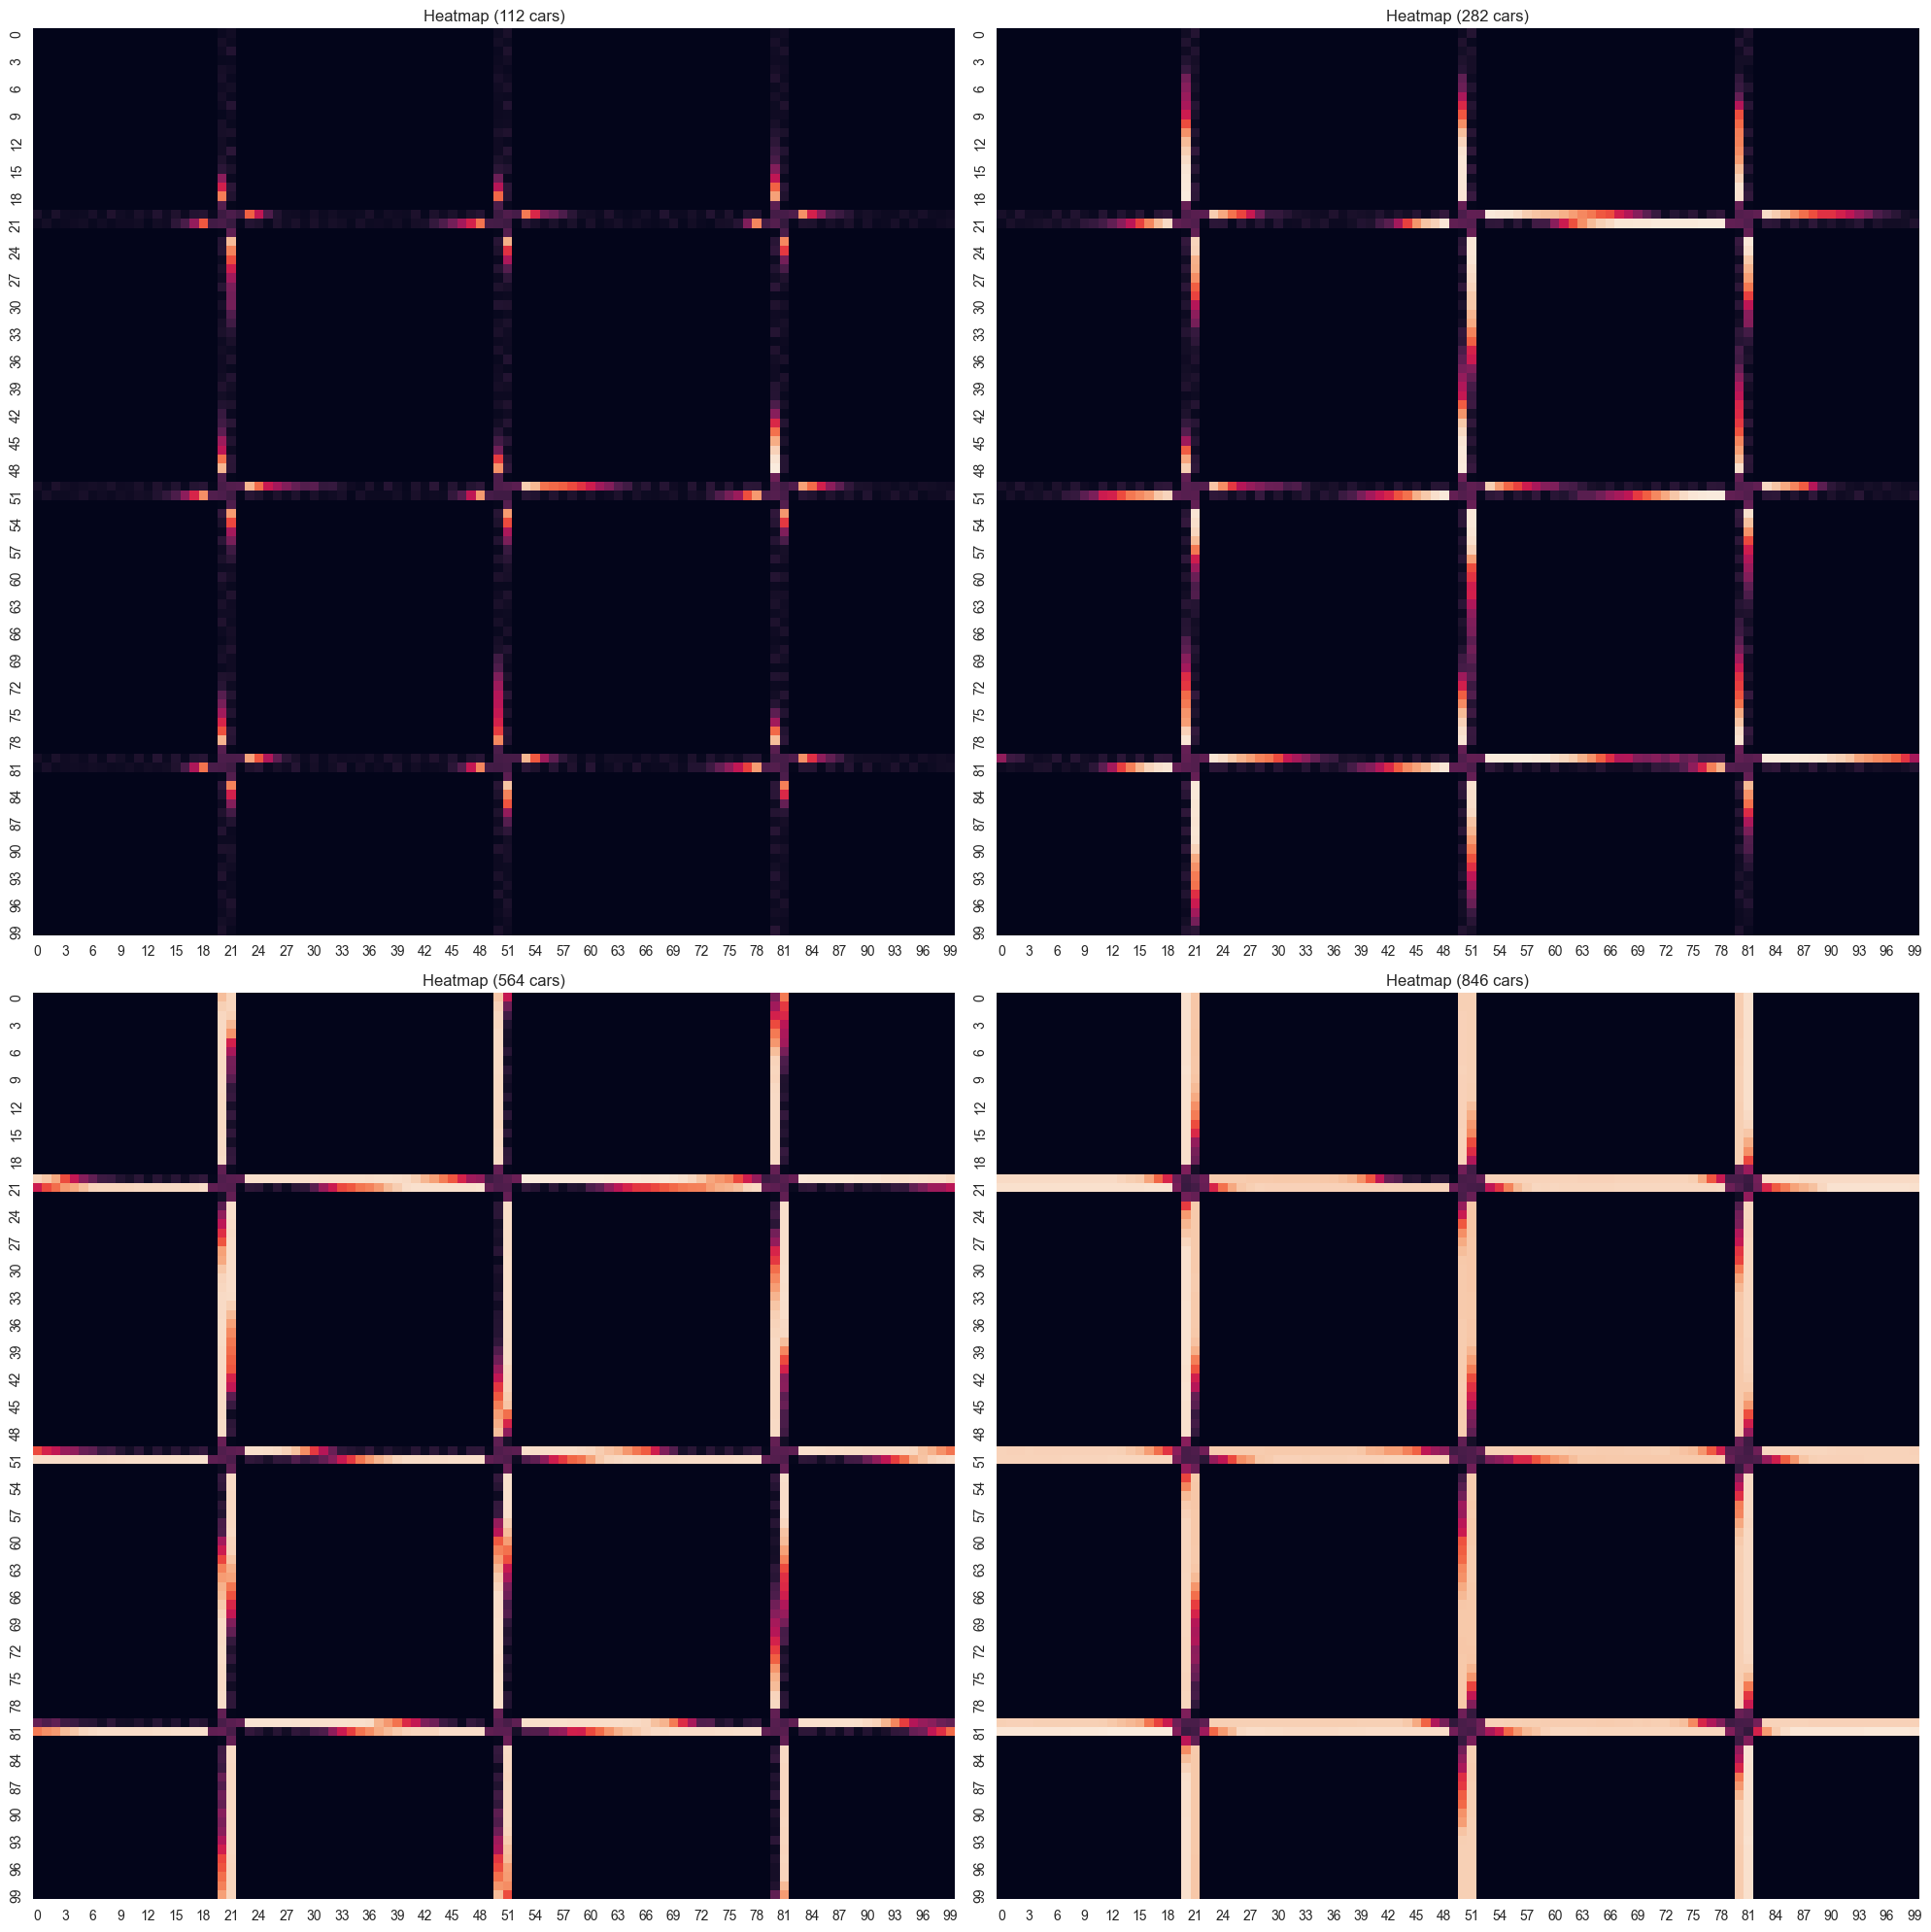

In [16]:
s.generate_heatmaps(heat_map_lists[4:8], cars_numbers, True, 'heatmaps_lights_10')

## Heatmaps (lights time = 15)

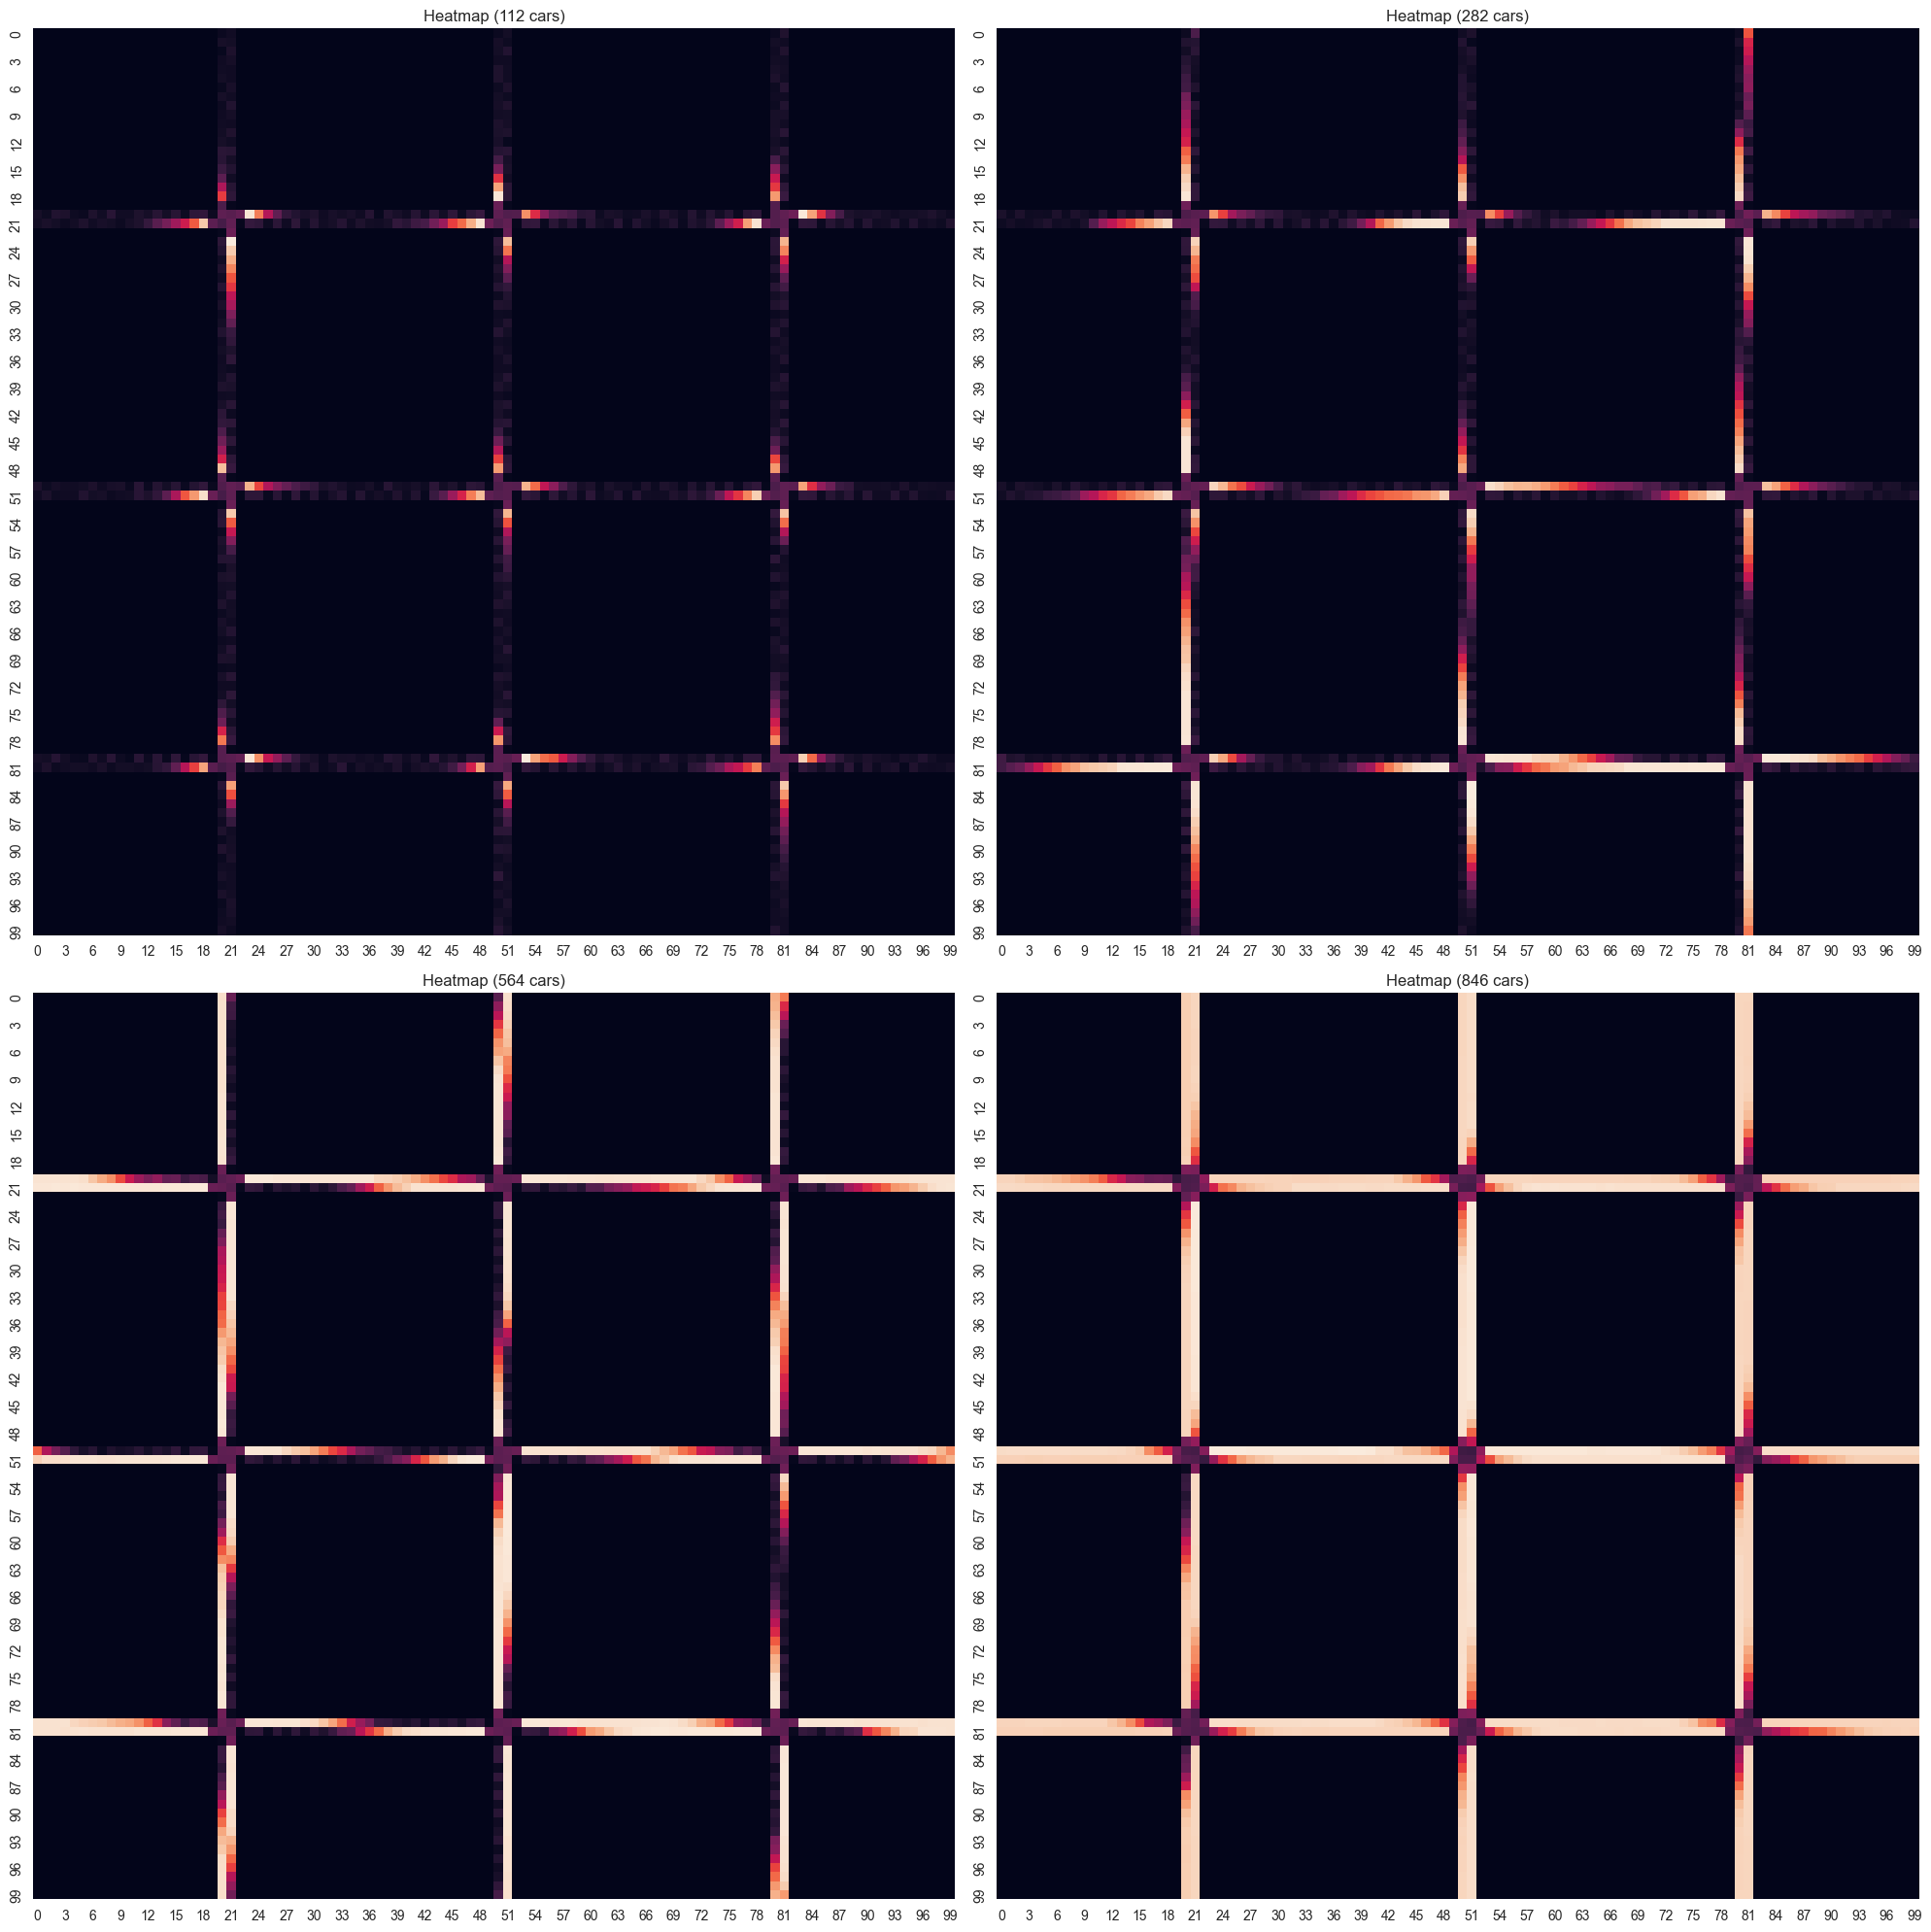

In [17]:
s.generate_heatmaps(heat_map_lists[8:12], cars_numbers, True, 'heatmaps_lights_15')

## Average time to travel specified distances (lights time = 5)

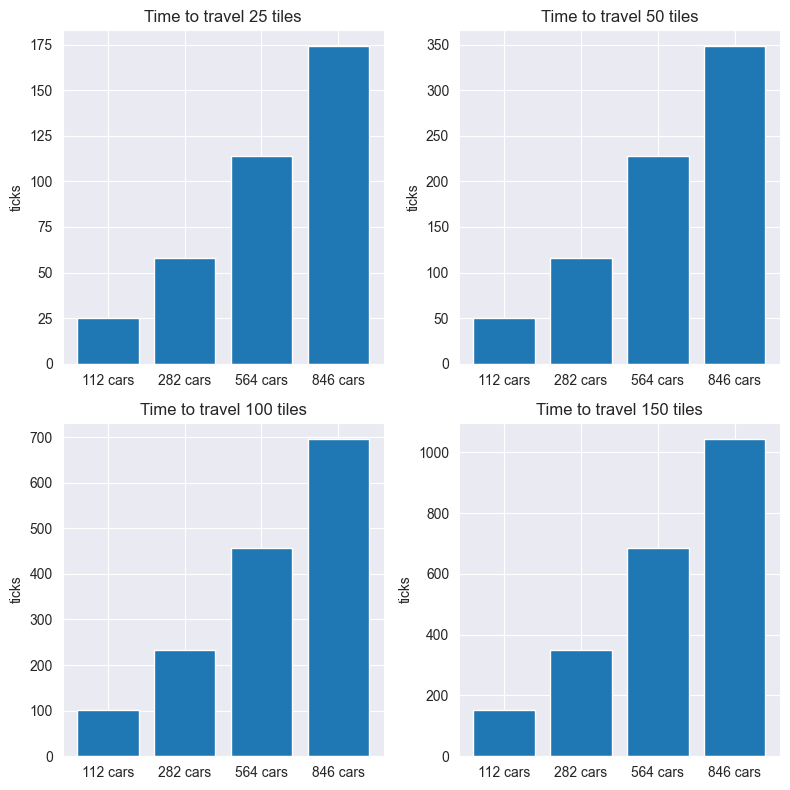

In [22]:
s.generate_travel_time_plots(average_section_travel_time_lists[0:4], cars_numbers, distances, True, 'travel_time_lights_5')

## Average time to travel specified distances (lights time = 10)

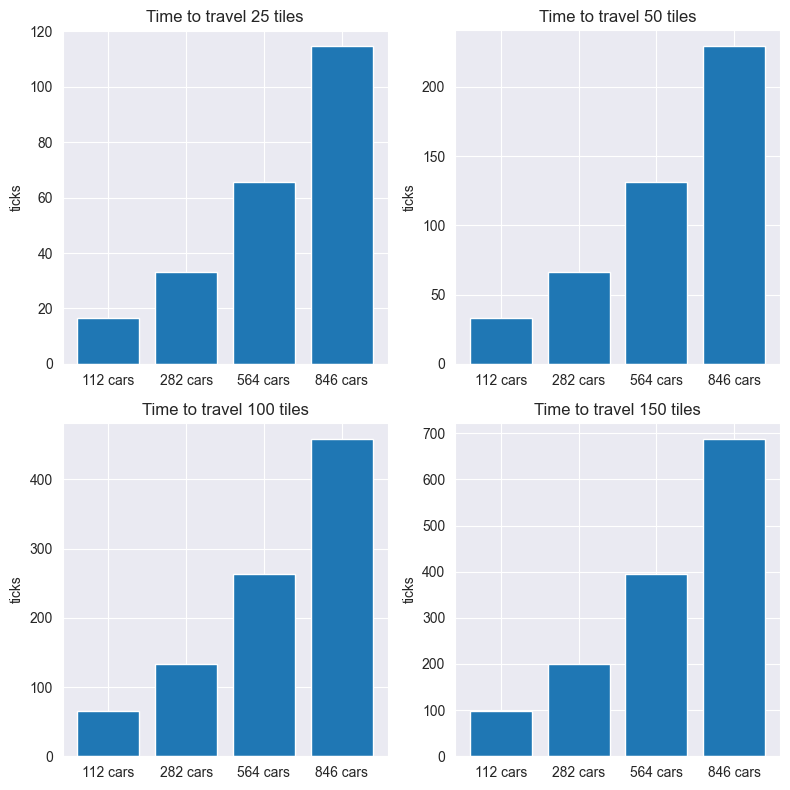

In [19]:
s.generate_travel_time_plots(average_section_travel_time_lists[4:8], cars_numbers, distances, True, 'travel_time_lights_10')

## Average time to travel specified distances (lights time = 15)

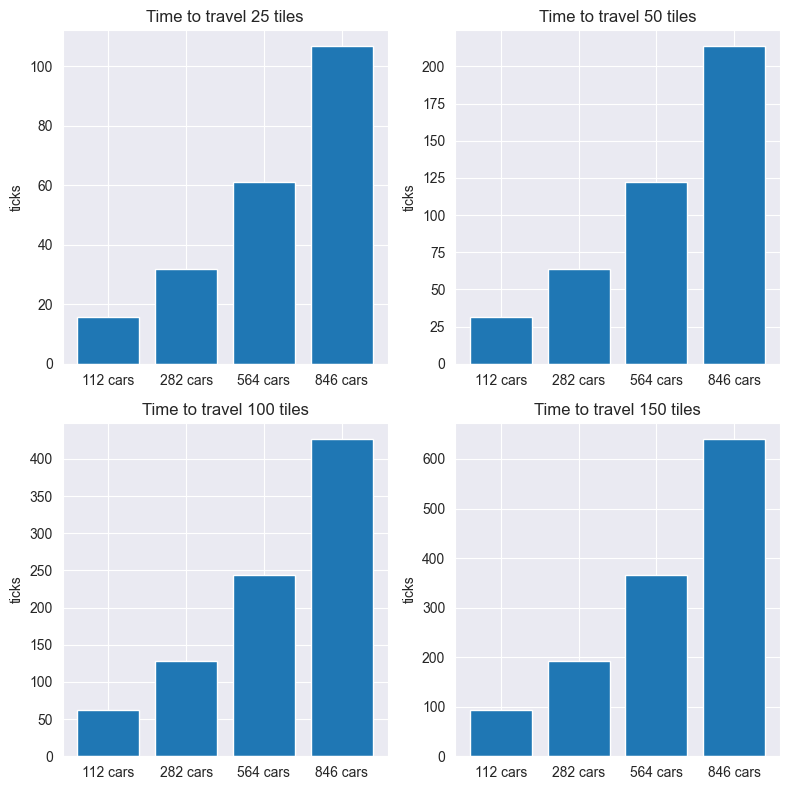

In [21]:
s.generate_travel_time_plots(average_section_travel_time_lists[8:12], cars_numbers, distances, True, 'travel_time_lights_15')

Increasing the length of traffic lights affects the decrease in average travel times of certain length units. This phenomenon, however, with the increase in the time of the lights begins to die out, (smaller and smaller differences are noticeable), and at a certain point, further increases in the time of traffic lights no longer affect the decrease in average travel times on the contrary, it may begin to have a negative effect. This situation is well illustrated by the graphs below. It is also clear that, fewer cars have a positive effect on the average travel time. Compared to the simulation without lights, also in this case the simulation without lights obtained better results even for the longest light period studied.

## Simulating different scenarios (lights times)

In [4]:
cars_numbers = [112, 282, 564, 846]
distances = [25, 50, 100, 150]
mean_vs_lists = []
stop_cars_lists = []
moving_cars_list = []
heat_map_lists = []
average_section_travel_time_lists = []
lights_times = [x for x in range(5, 40)]
TICKS = 1000
V_MAX = 6


# loop through different scenarios (cars number on map)
for lights_time in lights_times:
    for cars_number in cars_numbers:
        CARS_NUMBER = cars_number
        map = Map(100)
        simulation = Simulation(v_max=V_MAX, map=map, cars_number=CARS_NUMBER, lights=True, lights_time=lights_time, time=1)
        engine = Engine(simulation, map)

        mean_vs = []
        stop_cars = []
        moving_cars = []
        heat_map = engine.map.car_v_map
        times = []
        #loop simulation number of ticks
        for i in range(TICKS):
            engine.loop(time=1) # no need time here

        #calculation of travel times
        for distance in distances:
            time = s.average_section_travel_time(engine.simulation.cars, distance, CARS_NUMBER, TICKS)
            times.append(time)

        #updating lists (need for visualizations)
        average_section_travel_time_lists.append(times)

In [84]:
import pandas as pd
def generate_plot(distance, tiles):
    distance_move_mean = pd.Series(distance)
    window_size = 3
    rolling_avg = distance_move_mean.rolling(window=window_size).mean()
    plt.plot(distance, linewidth=1, label='original')
    plt.plot(rolling_avg, linewidth=2, label='move mean')
    plt.ylabel('tick')
    plt.xlabel('lights time')
    plt.title(f'Time to travel {tiles} tiles')
    plt.legend()
    return plt.plot()

In [93]:
def generate_averages_times_plots(distances, cars_num, to_png, png_name):
    distance_1 = distances[0]
    distance_2 = distances[1]
    distance_3 = distances[2]
    distance_4 = distances[3]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
    ax = axes[0, 0]  # Wybór odpowiedniej osi
    plt.sca(ax)  # Ustawienie bieżącej osi
    generate_plot(distance_1, '25')

    ax = axes[0, 1]  # Wybór odpowiedniej osi
    plt.sca(ax)  # Ustawienie bieżącej osi
    generate_plot(distance_2, '50')

    ax = axes[1, 0]  # Wybór odpowiedniej osi
    plt.sca(ax)  # Ustawienie bieżącej osi
    generate_plot(distance_3, '100')

    ax = axes[1, 1]  # Wybór odpowiedniej osi
    plt.sca(ax)  # Ustawienie bieżącej osi
    generate_plot(distance_4, '150')

    plt.tight_layout()
    if to_png:
        plt.savefig(f'plots/{png_name}.png')
    plt.subplots_adjust(top=0.9)
    fig.suptitle(f'Average travel times for specific distances ({cars_num} cars)')
    plt.show()

In [94]:
new_lists = [[] for _ in range(4)]  # creating 4 (4 cars_numbers categories) empty suplists

for i, list in enumerate(average_section_travel_time_lists):
    new_lists[i % 4].append(list)

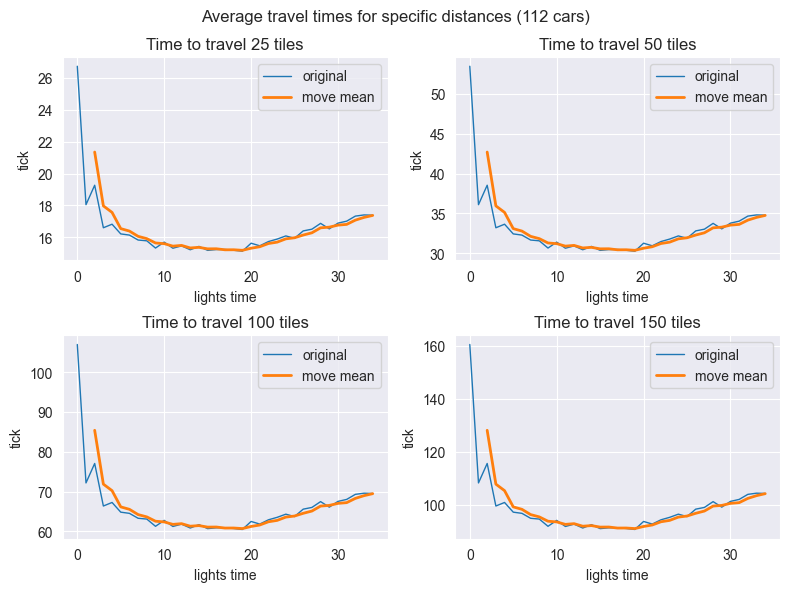

In [95]:
distance_1 = [sublist[0] for sublist in new_lists[0]]
distance_2 = [sublist[1] for sublist in new_lists[0]]
distance_3 = [sublist[2] for sublist in new_lists[0]]
distance_4 = [sublist[3] for sublist in new_lists[0]]
distances = [distance_1, distance_2, distance_3, distance_4]
generate_averages_times_plots(distances, 112, True, 'travel_times_plots_112_cars')

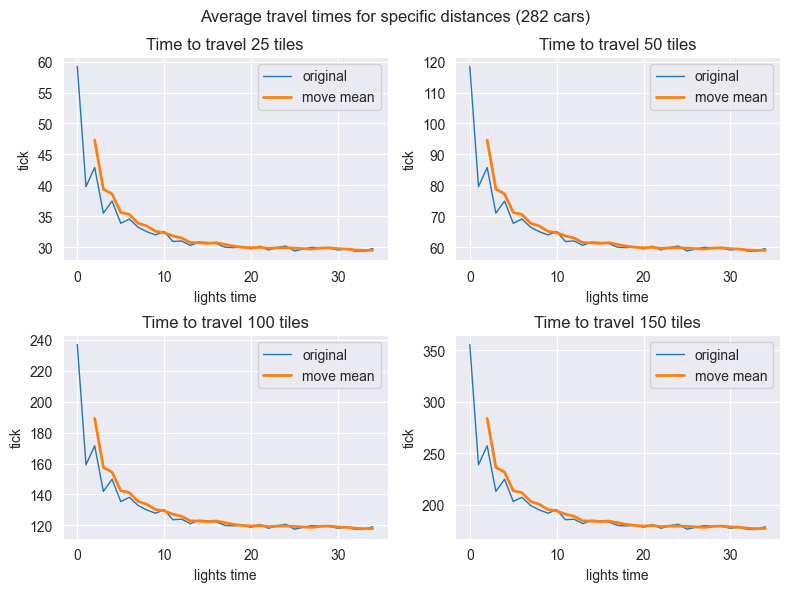

In [96]:
distance_1 = [sublist[0] for sublist in new_lists[1]]
distance_2 = [sublist[1] for sublist in new_lists[1]]
distance_3 = [sublist[2] for sublist in new_lists[1]]
distance_4 = [sublist[3] for sublist in new_lists[1]]
distances = [distance_1, distance_2, distance_3, distance_4]
generate_averages_times_plots(distances, 282, True, 'travel_times_plots_282_cars')

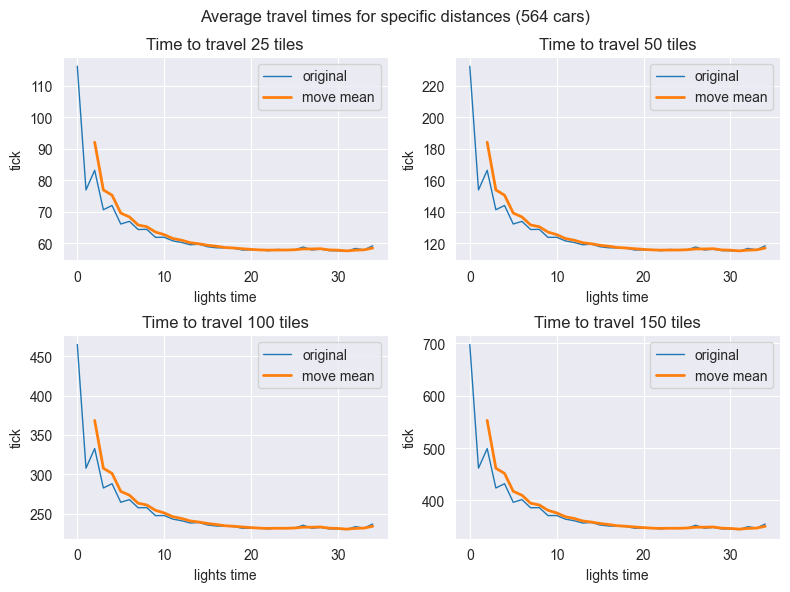

In [97]:
distance_1 = [sublist[0] for sublist in new_lists[2]]
distance_2 = [sublist[1] for sublist in new_lists[2]]
distance_3 = [sublist[2] for sublist in new_lists[2]]
distance_4 = [sublist[3] for sublist in new_lists[2]]
distances = [distance_1, distance_2, distance_3, distance_4]
generate_averages_times_plots(distances, 564, True, 'travel_times_plots_564_cars')

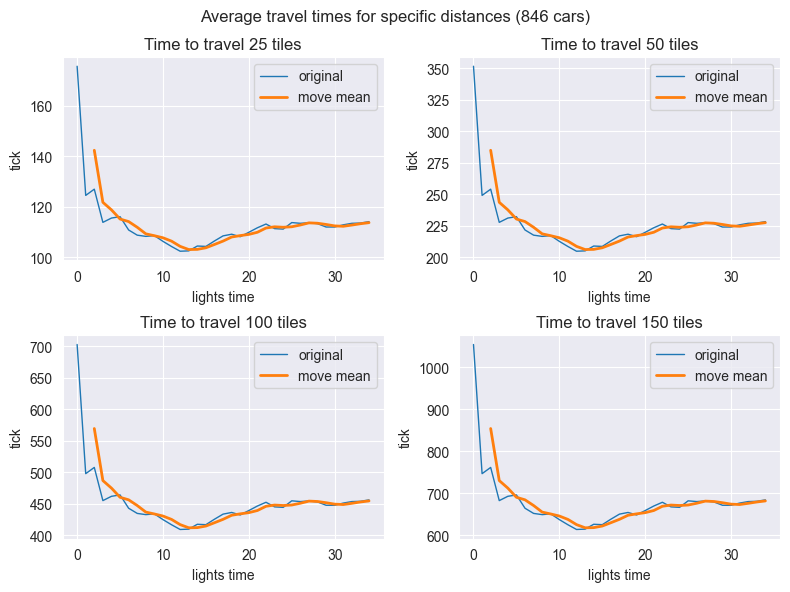

In [98]:
distance_1 = [sublist[0] for sublist in new_lists[3]]
distance_2 = [sublist[1] for sublist in new_lists[3]]
distance_3 = [sublist[2] for sublist in new_lists[3]]
distance_4 = [sublist[3] for sublist in new_lists[3]]
distances = [distance_1, distance_2, distance_3, distance_4]
generate_averages_times_plots(distances, 846, True, 'travel_times_plots_846_cars')

## Conclusions

#### The following conclusions can be drawn from the analyses:
* The direct influence on reducing traffic efficiency and thus creating traffic jams is the increase in the number of cars on the road. This factor appears to be crucial and heavy, and in extreme situations even impossible to control.
* Traffic signals do not always improve traffic efficiency. The results of the study show that in the simulation studied, traffic performance was better without than with traffic lights. This can be influenced by a number of factors. Among other things, the implementation studied assumed synchronous operation of the entire traffic signal network, while in reality the traffic signals operate interdependently, or are connected to a traffic optimization system that continuously analyzes the current traffic situation in order to intelligently and optimally manage traffic. In addition, the simulation assumes an even distribution of cars on the roads, as well as rigid turning probabilities, while in reality the road network usually consists of main roads, more frequently traveled roads run in a particular direction, and side/alternative roads. Nevertheless, the studied example shows that signaling, while having some advantages in terms of structuring or traffic manageability, is not always the optimal solution and should be subjected to some studies of interaction with the environment before being added to a given intersection.
* Driver behavior is key. The above point also gives reason to believe that with proper driver behavior and skills, traffic can be more efficient. Other studies also indicate this. Factors such as reaction time, confidence in decision-making at intersections, for example, or maintaining appropriate distances significantly affect traffic flow. It is hard to demand that in reality every driver behaves perfectly in every possible situation. Autonomous cars, which will be able to communicate with each other to make optimal decisions, could be an interesting solution to this problem.
* The length of traffic lights has a direct impact on traffic efficiency. The results from studies clearly indicate that there is a certain interval of time for traffic light phases that is optimal. While shortening or lengthening this period will have a negative impact.
